# Q01

This Jupyter notebook should answer the following Question:

***How do the occurence and severity of falls vary across different clinical departments?***


This can be split up into:
- P01: Fall stats
- P02: How do the occurrence of falls vary across different clinical departments?
- P03: How do the occurrence of falls vary across time?
- P04: How do severity of falls vary across different clinical departments?
- P05: Development of priority list

in order to answer the question, each of the sections will be addressed sepaerately with two methods:
- Descriptive statistics (https://www.researchgate.net/publication/360070038_Einfuhrung_in_die_Statistik_-_Lagemasse)
- visualization




# Imports

In [41]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import seaborn as sns

In [42]:
# movements of all patients
nBew = pd.read_pickle("data/src_pkl/nBew.pkl")


In [43]:
# table with case and patient id
patId = pd.read_pickle("data/src_pkl/patID.pkl")

In [44]:
# fall documentation
fallD = pd.read_pickle("data/src_pkl/sturzD.pkl")

In [45]:
# colors for graphs
color_01 = '#1A3F6E'
color_02 = '#105067'
color_03 = '#56A6D3'    
color_04 = '#578494'

color_dark = '#0A1C3E'
color_contrast1 = '#E0586C'
color_contrast2 = '#F25E4D'


# P01

fall stats

### Preparation

*falls_per_case* gives the falls per case where falls occur

In [46]:
# counts the falls per case
falls_per_case = fallD.groupby('c_pseudonym'
    ).size(
    ).reset_index(name='fall_occurrence'
    ).sort_values(by='fall_occurrence', ascending=False)

*all_pat_fall* gives all cases and the number of falls (0 if no fall)

In [48]:
# Merge patId with selected columns of fallD on 'c_pseudonym', using a left join, and drop 'Unnamed: 0' column
all_pat_fall = pd.merge(patId, falls_per_case, on='c_pseudonym', how='left').drop(columns=['Unnamed: 0'])

# Replace NaN in 'c_patnr_pseudonym_y' with 0, and non-NaN with 1
all_pat_fall['fall_occurrence'] = all_pat_fall['fall_occurrence'].fillna(0).astype(int)

all_pat_fall = all_pat_fall.sort_values('fall_occurrence', ascending=False)


checks if falls are unique

since falls are unique, we can set them to index

In [50]:
all_pat_fall = all_pat_fall.set_index('c_pseudonym')

### Descriptive statistics


number of occurrence of falls:
- mode
- five numbers summary
- viszualisation


In [51]:
print('Number of cases: ',all_pat_fall.shape[0])
print('Number of falls: ',falls_per_case['fall_occurrence'].sum())
print('Number of patient cases falling: ',falls_per_case.shape[0])
print('Percentage of cases with falls: ',round((falls_per_case.shape[0]/all_pat_fall.shape[0])*100,2))




Number of cases:  2924864
Number of falls:  14260
Number of patient cases falling:  11242
Percentage of cases with falls:  0.38


<span style="color:green"> 

## Classification

### Topic: Absolute numbers

**Findings:** 
 
There is a high number of people (14 532), but that is comparatively low in relation to the total number of patients (3 332 639). This means that fallen patients only make up 0.44% of all cases.

**Implications (for care):** 

none

**Limitations and justification:**

none

</span>

In [52]:
# Calculate five-number summary in one line
five_num_summary = all_pat_fall['fall_occurrence'].quantile([0, 0.25, 0.5, 0.75, 1]).sort_index()

# Print the five-number summary with labels
print("Five-Number Summary All cases:")
print(f"Minimum: {five_num_summary.loc[0.00]}")
print(f"First Quartile (Q1): {five_num_summary.loc[0.25]}")
print(f"Median (Q2): {five_num_summary.loc[0.50]}")
print(f"Third Quartile (Q3): {five_num_summary.loc[0.75]}")
print(f"Maximum: {five_num_summary.loc[1.00]}")

Five-Number Summary All cases:
Minimum: 0.0
First Quartile (Q1): 0.0
Median (Q2): 0.0
Third Quartile (Q3): 0.0
Maximum: 18.0


In [53]:
# Calculate five-number summary in one line
five_num_summary = falls_per_case['fall_occurrence'].quantile([0, 0.25, 0.5, 0.75, 1]).sort_index()

# Print the five-number summary with labels
print("Five-Number Summary Fallers:")
print(f"Minimum: {five_num_summary.loc[0.00]}")
print(f"First Quartile (Q1): {five_num_summary.loc[0.25]}")
print(f"Median (Q2): {five_num_summary.loc[0.50]}")
print(f"Third Quartile (Q3): {five_num_summary.loc[0.75]}")
print(f"Maximum: {five_num_summary.loc[1.00]}")

Five-Number Summary Fallers:
Minimum: 1.0
First Quartile (Q1): 1.0
Median (Q2): 1.0
Third Quartile (Q3): 1.0
Maximum: 18.0


/var/folders/_v/9sq5h7j92hj_c44txqz68s7w0000gn/T/ipykernel_72069/1738680282.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


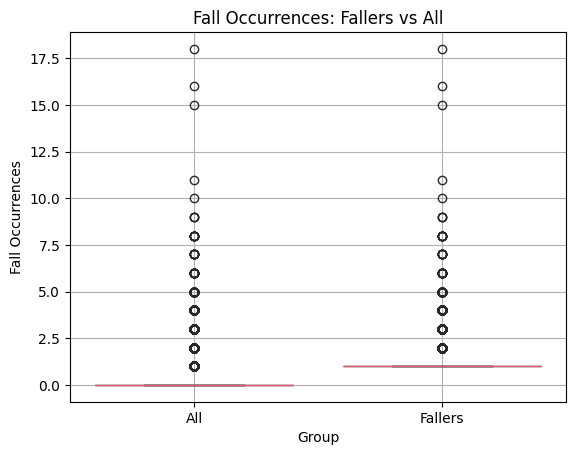

In [54]:
# Add labels to distinguish the groups
all_pat_fall['Group'] = 'All'
falls_per_case['Group'] = 'Fallers'

# Combine the DataFrames
combined_df = pd.concat([all_pat_fall, falls_per_case])


sns.boxplot(
    x='Group', y='fall_occurrence', data=combined_df,
    palette={"All": color_01, "Fallers": color_03},
    showfliers=True,
    medianprops=dict(color=color_contrast1)
)


plt.title('Fall Occurrences: Fallers vs All')
plt.suptitle('')  # Remove the default title to clean up the plot
plt.xlabel('Group')
plt.ylabel('Fall Occurrences')
plt.grid(True)
plt.show()

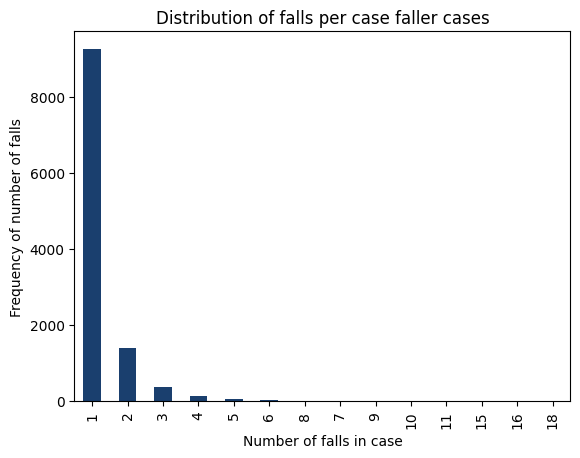

In [55]:
# plots  Distribution of fall occurrences per case
dist_falls_fallers = (falls_per_case['fall_occurrence']
    .value_counts()
    .reset_index()
    .reset_index()
    .sort_values(['count','fall_occurrence'], ascending=[False,True])
)
dist_falls_fallers.plot(x='fall_occurrence', y='count',kind='bar',legend=None, color=color_01)

plt.xlabel("Number of falls in case")
plt.ylabel("Frequency of number of falls")
plt.title("Distribution of falls per case faller cases")

plt.show()

In [56]:
dist_falls_fallers['percentage'] = round(dist_falls_fallers['count']/dist_falls_fallers['count'].sum()*100,2)
dist_falls_fallers['percentage_cum'] = dist_falls_fallers['percentage'].cumsum()
dist_falls_fallers

,index,fall_occurrence,count,percentage,percentage_cum
0,0,1,9259,82.36,82.36
1,1,2,1395,12.41,94.77
2,2,3,362,3.22,97.99
3,3,4,123,1.09,99.08
4,4,5,60,0.53,99.61
5,5,6,18,0.16,99.77
6,6,8,9,0.08,99.85
7,7,7,8,0.07,99.92
8,8,9,3,0.03,99.95
13,13,10,1,0.01,99.96


In [57]:
# get percentage of cases with more than one fall
once = dist_falls_fallers[dist_falls_fallers['fall_occurrence']==1]['count'].sum()
more = dist_falls_fallers[dist_falls_fallers['fall_occurrence']>1]['count'].sum()

more/(once+more)*100

17.639210104963528

In [58]:
pseudonym_counts = (pd.merge(fallD,patId, on='c_pseudonym')
                    .drop(columns=['Unnamed: 0'])['c_patnr_pseudonym']
    .value_counts()
    .value_counts()
    .reset_index(name='occurrence_of_number_of_falls')
    .rename(columns={'count': 'number_of_falls'})
    .sort_values(by=['occurrence_of_number_of_falls', 'number_of_falls'], ascending=[False, True])
)


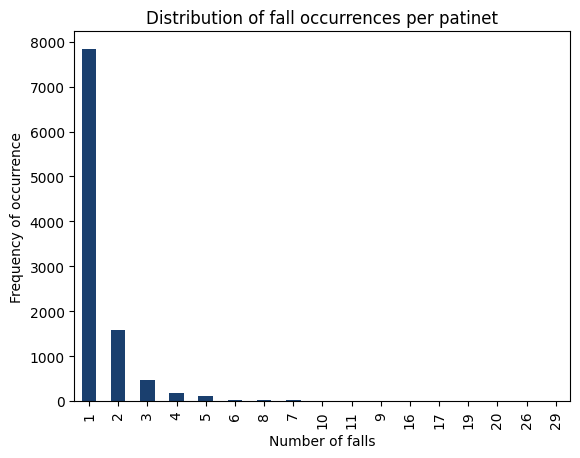

In [59]:
pseudonym_counts.plot(x='number_of_falls', y='occurrence_of_number_of_falls',  kind='bar', color=color_01)

plt.xlabel("Number of falls")
plt.ylabel("Frequency of occurrence")
plt.title("Distribution of fall occurrences per patinet")
plt.legend().set_visible(False)
plt.show()

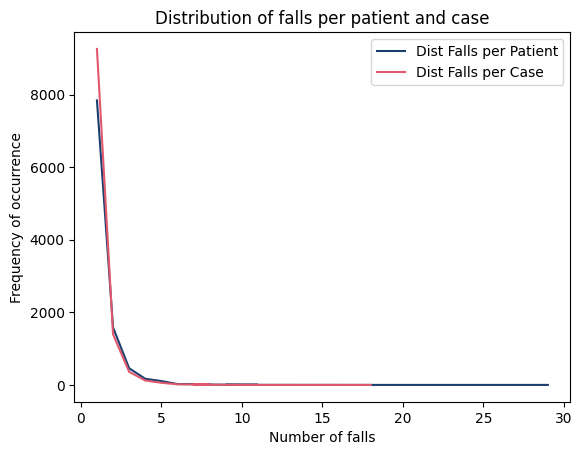

In [60]:
# Create a figure and an axes object
fig, ax = plt.subplots()

# Plot the first dataframe
pseudonym_counts.plot(x='number_of_falls', y='occurrence_of_number_of_falls', kind='line', ax=ax, label='Dist Falls per Patient',color=color_01)

# Plot the second dataframe on the same axes
dist_falls_fallers.plot(x='fall_occurrence', y='count', kind='line', ax=ax, color=color_contrast1, label='Dist Falls per Case')

# Set labels and title
ax.set_xlabel("Number of falls")
ax.set_ylabel("Frequency of occurrence")
ax.set_title("Distribution of falls per patient and case")

# Show the legend
ax.legend()

# Display the plot
plt.show()


<span style="color:green"> 

## Classification

### Topic: Disatribution number of falls

**Findings:** 

The data shows, that distribution among all cases show again that most of the patients dont fall, this is true with quantile 3 being at 0.0. This is similar for all fallers. Here, up to quantile 3, the number of falls was 1.

When investigating the frequency of occurrence of number of falls, both on case and patient level, we see a Peak at one fall, with a stark decline up to four fals. After five, the frequency of occurrence is in the single digits.

**Implications (for care):** 

most of the patients only fall once (82.28%) and less then one percent of patients fall more then four times.

**Limitations and justification:**

none
</span>

# P02

*How do the occurence of falls vary across different clinical departments?*

Analysis for:
- S01: Falls across **all** depatments
- S02: Falls across fall departments





## P02_S01/S02


### Preparations

All cases per department

In [61]:
# Count the number of visits per department directly
cases_per_dep = (nBew.groupby('c_orgfa').size()
                 .reset_index(name='occurrence')
                 .rename(columns={'c_orgfa': 'department','occurrence':'number_of_cases'})
                 .sort_values('number_of_cases', ascending=False)
                )


All falls per department

In [62]:
# only add up to one fall per case
fallD_one_fall_per_case = fallD.drop_duplicates(subset=['c_pseudonym'])
# table containing the falls per department
falls_unique_per_dep = (fallD_one_fall_per_case['Fachliche Zuweisung']
    .value_counts()
    .reset_index()
    .rename(columns={'count': 'number_cases_falling', 'Fachliche Zuweisung': 'department'})
    .set_index('department'))

In [63]:
# table containing the falls per department
falls_per_dep = (fallD['Fachliche Zuweisung']
    .value_counts()
    .reset_index()
    .rename(columns={'count': 'number_of_falls', 'Fachliche Zuweisung': 'department'})
    .set_index('department'))

In [64]:
falls_per_dep = pd.merge(falls_per_dep, falls_unique_per_dep, on='department', how='left')

merge all cases and all falls per department in *dep_cases_falls*

In [65]:
dep_cases_falls = pd.merge(cases_per_dep,falls_per_dep, on='department', how='left')

dep_cases_falls = dep_cases_falls.sort_values('department', ascending=True)
dep_cases_falls['number_of_falls'] = dep_cases_falls['number_of_falls'].fillna(0).astype(int)
dep_cases_falls['number_cases_falling'] = dep_cases_falls['number_cases_falling'].fillna(0).astype(int)


### Descriptive statistics


number of occurrence of falls:
- mode
- five numbers summary
- correlation
- viszualisation


In [66]:
# Calculate five-number summary in one line
five_num_summary = dep_cases_falls['number_of_cases'].quantile([0, 0.25, 0.5, 0.75, 1]).sort_index()

# Print the five-number summary with labels
print("Five-Number Summary Cases per Department:")
print(f"Minimum: {five_num_summary.loc[0.00]}")
print(f"First Quartile (Q1): {five_num_summary.loc[0.25]}")
print(f"Median (Q2): {five_num_summary.loc[0.50]}")
print(f"Third Quartile (Q3): {five_num_summary.loc[0.75]}")
print(f"Maximum: {five_num_summary.loc[1.00]}")

Five-Number Summary Cases per Department:
Minimum: 1.0
First Quartile (Q1): 418.5
Median (Q2): 11040.5
Third Quartile (Q3): 269275.0
Maximum: 1003622.0


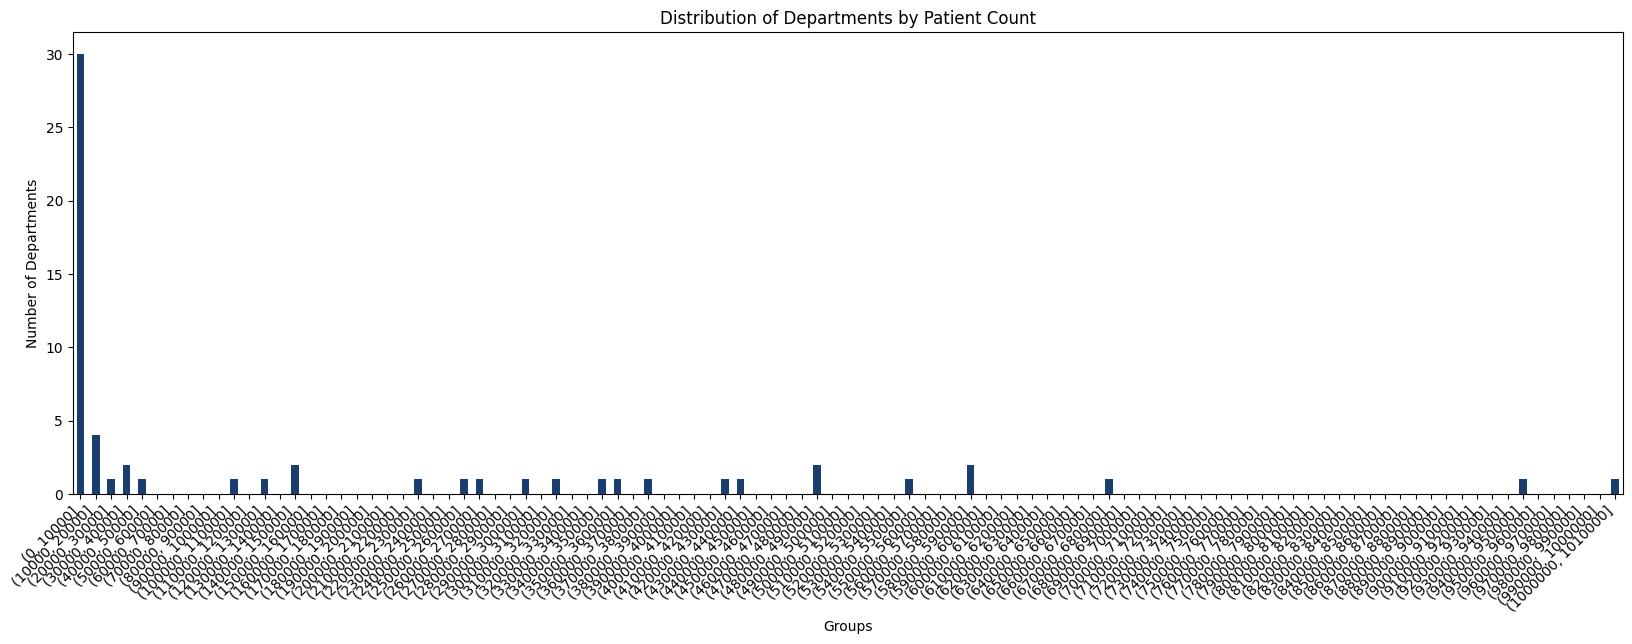

In [67]:
# Assuming you already have dep_cases_falls['number_of_cases']
# Set the group size
group_size = 10000

# Calculate max value
max_value = dep_cases_falls['number_of_cases'].max()

# Create bins dynamically based on group size
num_bins = int(np.ceil(max_value / group_size)) + 1
bins = [i * group_size for i in range(num_bins)]

# Ensure the last bin edge is the next number divisible by 10000 after max_value
if bins[-1] < max_value:
    bins.append(bins[-1] + group_size)
else:
    bins[-1] = int(np.ceil(max_value / 10000)) * 10000


# Group the data
groups = pd.cut(dep_cases_falls['number_of_cases'], bins=bins)

# Count occurrences in each group
group_counts = groups.value_counts().sort_index()

# Ensure all groups are represented, including empty groups
all_groups = pd.Series(0, index=pd.IntervalIndex.from_breaks(bins))
group_counts = all_groups.add(group_counts, fill_value=0)

# Print the group counts

# Plot the data
group_counts.plot(kind='bar', figsize=(20, 6),color=color_01)

plt.xlabel('Groups')
plt.ylabel('Number of Departments')
plt.title('Distribution of Departments by Patient Count')
plt.xticks(rotation=45, ha='right')
plt.show()



<span style="color:green"> 

## Classification

### Topic: Distribution of Departments

**Findings:** 

There are 213 departments in the dataset.
Average number of cases in a department is 5 759 cases, with a Q1 at 562 and a Q3 at 78 990 cases. The max amount of patients in the departments WAUGEN with 441 972 cases and slightly below, MDERMA with 440 459 cases.


**Implications (for care):** 

none

**Limitations and justification:**

none

</span>

In [68]:
print('Number of Departments in Dataset: ', dep_cases_falls.shape[0])
print('Number of Departments with falls in Dataset: ', dep_cases_falls[dep_cases_falls['number_of_falls'] > 0]['number_of_falls'].count())

Number of Departments in Dataset:  60
Number of Departments with falls in Dataset:  29


In [69]:
# Calculate five-number summary in one line
five_num_summary = dep_cases_falls['number_of_falls'].quantile([0, 0.25, 0.5, 0.75, 1]).sort_index()

# Print the five-number summary with labels
print("Five-Number Summary Falls per Department (All Departments):")
print(f"Minimum: {five_num_summary.loc[0.00]}")
print(f"First Quartile (Q1): {five_num_summary.loc[0.25]}")
print(f"Median (Q2): {five_num_summary.loc[0.50]}")
print(f"Third Quartile (Q3): {five_num_summary.loc[0.75]}")
print(f"Maximum: {five_num_summary.loc[1.00]}")

Five-Number Summary Falls per Department (All Departments):
Minimum: 0.0
First Quartile (Q1): 0.0
Median (Q2): 0.0
Third Quartile (Q3): 148.75
Maximum: 2311.0


In [70]:
dep_cases_falls[dep_cases_falls['number_of_falls']>=1]['number_of_falls'].mean()

491.7241379310345

In [71]:
five_num_summary = dep_cases_falls[dep_cases_falls['number_of_falls']>=1]['number_of_falls'].quantile([0, 0.25, 0.5, 0.75, 1]).sort_index()

# Print the five-number summary with labels
print("Five-Number Summary Falls per Department (Faller Departments):")
print(f"Minimum: {five_num_summary.loc[0.00]}")
print(f"First Quartile (Q1): {five_num_summary.loc[0.25]}")
print(f"Median (Q2): {five_num_summary.loc[0.50]}")
print(f"Third Quartile (Q3): {five_num_summary.loc[0.75]}")
print(f"Maximum: {five_num_summary.loc[1.00]}")

Five-Number Summary Falls per Department (Faller Departments):
Minimum: 1.0
First Quartile (Q1): 51.0
Median (Q2): 160.0
Third Quartile (Q3): 660.0
Maximum: 2311.0


/var/folders/_v/9sq5h7j92hj_c44txqz68s7w0000gn/T/ipykernel_72069/4285029147.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


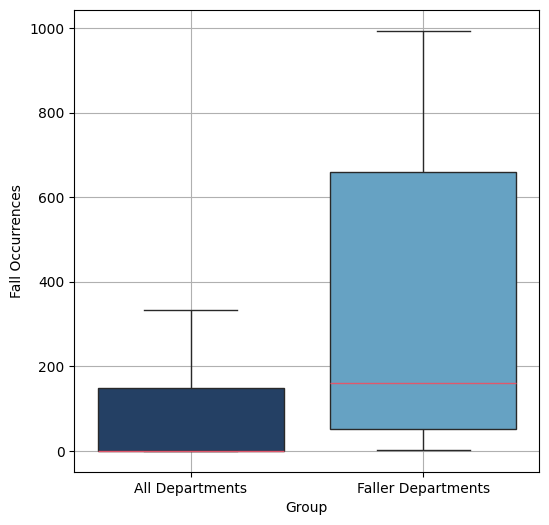

In [72]:
# Add labels to distinguish the groups
dep_cases_falls['Group'] = 'All Departments'
dep_cases_only_fallers = dep_cases_falls[dep_cases_falls['number_of_falls'] >= 1].copy()
dep_cases_only_fallers['Group'] = 'Faller Departments'

# Combine the DataFrames
combined_falls_severity = pd.concat([dep_cases_falls, dep_cases_only_fallers])

# Create a box plot with seaborn and customize line colors
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Group', y='number_of_falls', data=combined_falls_severity,
    palette={"All Departments": color_01, "Faller Departments": color_03},
    showfliers=False,
    medianprops=dict(color=color_contrast1)
)

#plt.title('Fall Occurrences: Fallers vs All Departments')
plt.xlabel('Group')
plt.ylabel('Fall Occurrences')
plt.grid(True)
plt.show()


<span style="color:green"> 

## Classification

### Topic: Fall Distribution in Departments

**Findings:** 

Only 125 out of 215 observed departments report falls.

Looking at all departments, the average number of falls per department is 5, with a Q1 of 0 and a Q3 of 63. In Contrast, when observing only the fallers departments, average numbers of falls is 46, with a Q1 of 12 and a Q3 of 153. 
The maximum amount of falls in one department is 728.


**Implications (for care):** 

When implementing interventions to prevent falls, it would be beneficial to target interventions to departments where falls occur to minimize cost and effort.

**Limitations and justification:**

the total numbers of falls do not account for the number of cases and percentage of falls in the department.

</span>

In [73]:
corr_cases_all_dep= dep_cases_falls['number_of_cases'].corr(dep_cases_falls['number_of_falls'])
corr_cases_faller_dep= dep_cases_only_fallers['number_of_cases'].corr(dep_cases_only_fallers['number_of_falls'])
print('Correlation between number of cases and number of falls in all departments: ',round(corr_cases_all_dep,4))
print('Correlation between number of cases and number of falls in faller departments: ',round(corr_cases_faller_dep,4))


Correlation between number of cases and number of falls in all departments:  0.7972
Correlation between number of cases and number of falls in faller departments:  0.7309


In [74]:
from scipy.stats import pearsonr

# Calculate correlation coefficient and p-value for all departments
corr_cases_all_dep, p_value_all_dep = pearsonr(dep_cases_falls['number_of_cases'], dep_cases_falls['number_of_falls'])

# Calculate correlation coefficient and p-value for faller departments
corr_cases_faller_dep, p_value_faller_dep = pearsonr(dep_cases_only_fallers['number_of_cases'], dep_cases_only_fallers['number_of_falls'])

# Print the results
print('Correlation between number of cases and number of falls in all departments: ', round(corr_cases_all_dep, 4))
print('P-value for all departments: ', round(p_value_all_dep, 4))

print('Correlation between number of cases and number of falls in faller departments: ', round(corr_cases_faller_dep, 4))
print('P-value for faller departments: ', round(p_value_faller_dep, 4))


Correlation between number of cases and number of falls in all departments:  0.7972
P-value for all departments:  0.0
Correlation between number of cases and number of falls in faller departments:  0.7309
P-value for faller departments:  0.0


according to: https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm#:~:text=Correlation%20coefficients%20whose%20magnitude%20are%20between%200.5%20and%200.7%20indicate,which%20have%20a%20low%20correlation.

there is a moderate correlation between number of cases and number of falls.

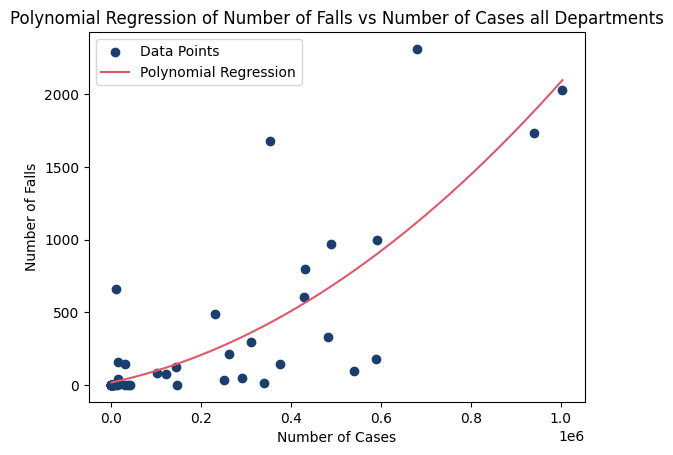

In [75]:
# Assuming dep_cases_falls is already defined with columns 'number_of_cases' and 'number_of_falls'
x = dep_cases_falls['number_of_cases']
y = dep_cases_falls['number_of_falls']

# Generating a third-order polynomial regression model
e = np.polyfit(x, y, 2)
p = np.poly1d(e)

# Define the x range for plotting the polynomial regression
x_range = np.linspace(min(x), max(x), 500)  # 500 points between min and max of x
y_range = p(x_range)  # Compute the y values using the polynomial

# Plotting the data points and the polynomial regression
plt.scatter(x, y, label='Data Points', color=color_01)
plt.plot(x_range, y_range, color=color_contrast1, label='Polynomial Regression')
plt.xlabel('Number of Cases')
plt.ylabel('Number of Falls')
plt.title('Polynomial Regression of Number of Falls vs Number of Cases all Departments')
plt.legend()
plt.show()


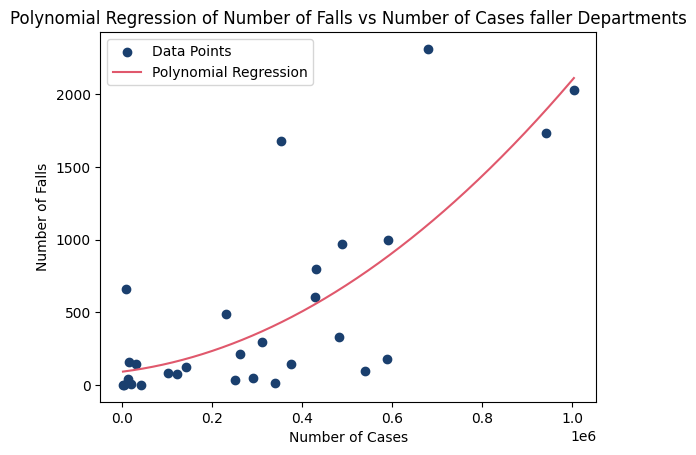

In [76]:
# Assuming dep_cases_falls is already defined with columns 'number_of_cases' and 'number_of_falls'
x = dep_cases_only_fallers['number_of_cases']
y = dep_cases_only_fallers['number_of_falls']

# Generating a third-order polynomial regression model
e = np.polyfit(x, y, 2)
p = np.poly1d(e)

# Define the x range for plotting the polynomial regression
x_range = np.linspace(min(x), max(x), 500)  # 500 points between min and max of x
y_range = p(x_range)  # Compute the y values using the polynomial

# Plotting the data points and the polynomial regression
plt.scatter(x, y, label='Data Points', color=color_01)
plt.plot(x_range, y_range, color=color_contrast1, label='Polynomial Regression')
plt.xlabel('Number of Cases')
plt.ylabel('Number of Falls')
plt.title('Polynomial Regression of Number of Falls vs Number of Cases faller Departments')
plt.legend()
plt.show()

<span style="color:green"> 

## Classification

### Topic: Correlation between Number of cases and number of falls in departments.

**Findings:** 

The correlation between the number of cases and number of falls in all departments is 0.5913, this translates into a moderate correlation. When only Looking at the fallers department, this correlation shrinks a bit to 0.524, also a moderate correlation.


**Implications (for care):** 

The moderate correlation shows that while the number of cases affects how many falls happen in a department, there are other important factors that also influence whether falls occur or not.

**Limitations and justification:**

The lower correlation in the fallers departments can be explained by the large number of departments with few patients and no falls in the all departments dataset.

</span>

correlation: https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm#:~:text=Correlation%20coefficients%20whose%20magnitude%20are%20between%200.5%20and%200.7%20indicate,which%20have%20a%20low%20correlation.

In [77]:
fallsPerDep = dep_cases_only_fallers.copy().drop(columns=['Group']).sort_values('number_of_falls', ascending=False).reset_index()
#number of falls
numFalls = fallD.shape[0]

#creates a tabe, containing depatemnts with most falls that together contain at least 50% of falls
fifty_percent = pd.DataFrame(columns=fallsPerDep.columns)
cumulative_sum =0
for index, row in fallsPerDep.iterrows():
    if cumulative_sum < 0.5 * numFalls:
        fifty_percent = pd.concat([fifty_percent, pd.DataFrame([row])])
        cumulative_sum += row['number_of_falls']
    else:
        break

In [78]:
print("fifty percent falls_severity contains ",str(round(fifty_percent['number_of_falls'].sum()/numFalls*100,2)),"% of total falls")

fifty percent falls_severity contains  54.33 % of total falls


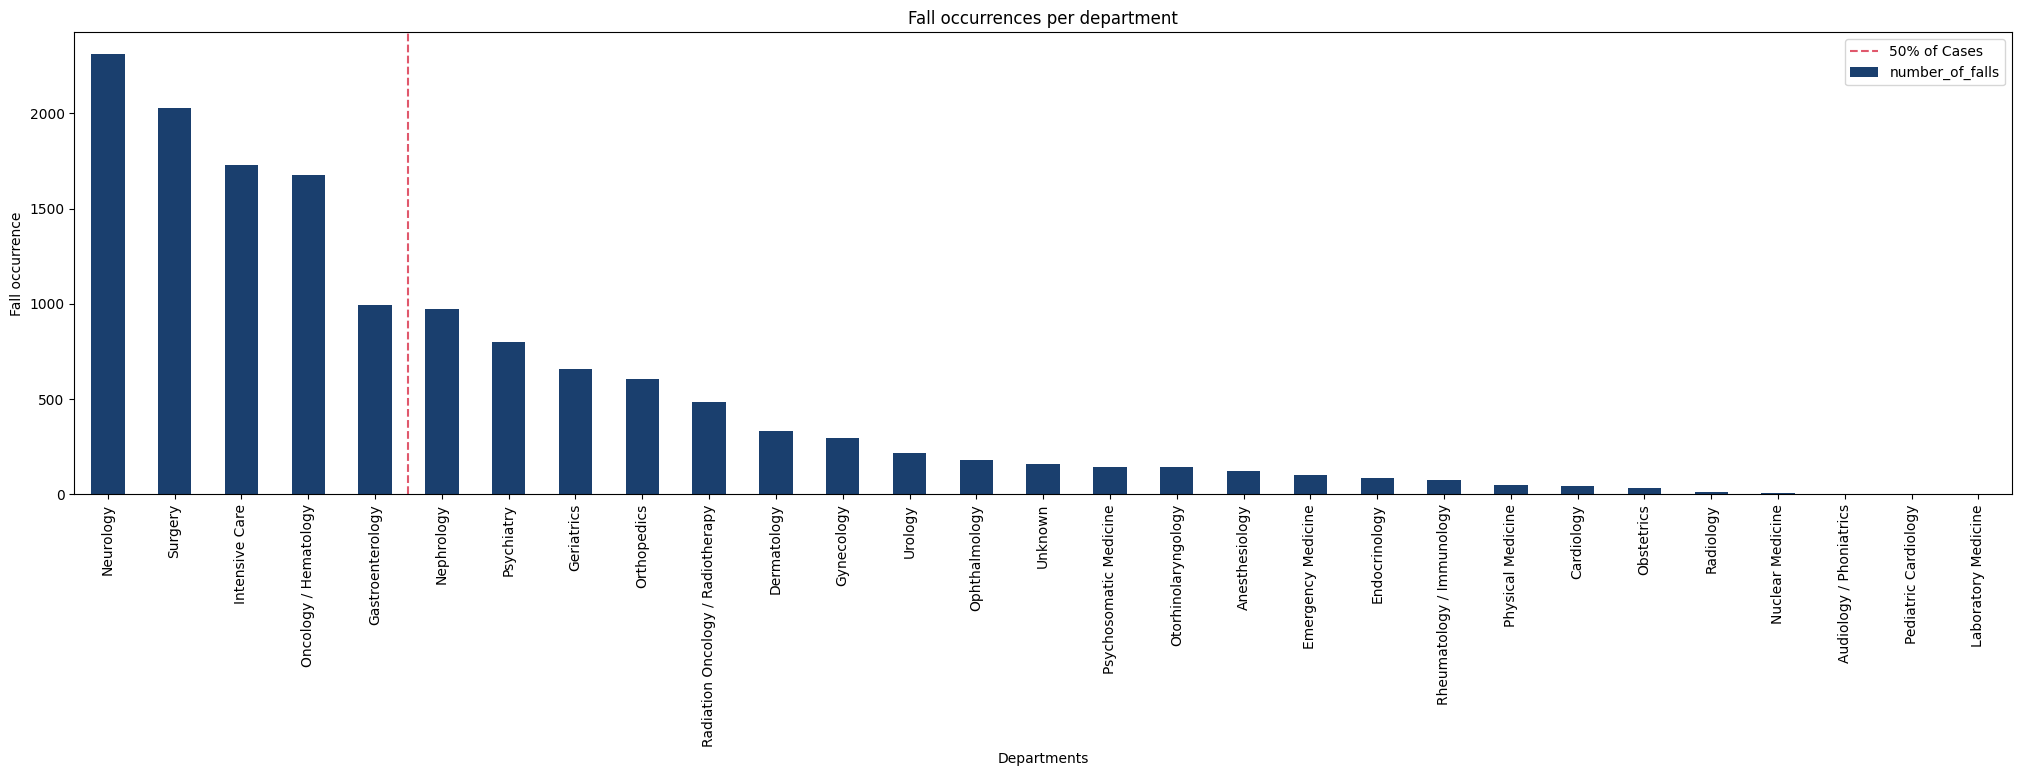

In [79]:
#plots falls per department, red line in middel of falls
fig, ax = plt.subplots(figsize=(25, 6)) 

# Create a bar plot
fallsPerDep.plot(kind='bar', x='department', y='number_of_falls', ax=ax, color=color_01)

#plot vertical line after 50%
ax.axvline(x=fifty_percent.shape[0]+0.5, color=color_contrast1, linestyle='--', label='50% of Cases')

plt.legend()

plt.xlabel("Departments")
plt.ylabel("Fall occurrence")
plt.title("Fall occurrences per department")

plt.show()

In [80]:
fallsPerDep['fall_incidence'] = fallsPerDep['number_cases_falling']/fallsPerDep['number_of_cases']
fallsPerDep = fallsPerDep.sort_values('fall_incidence',ascending=False)

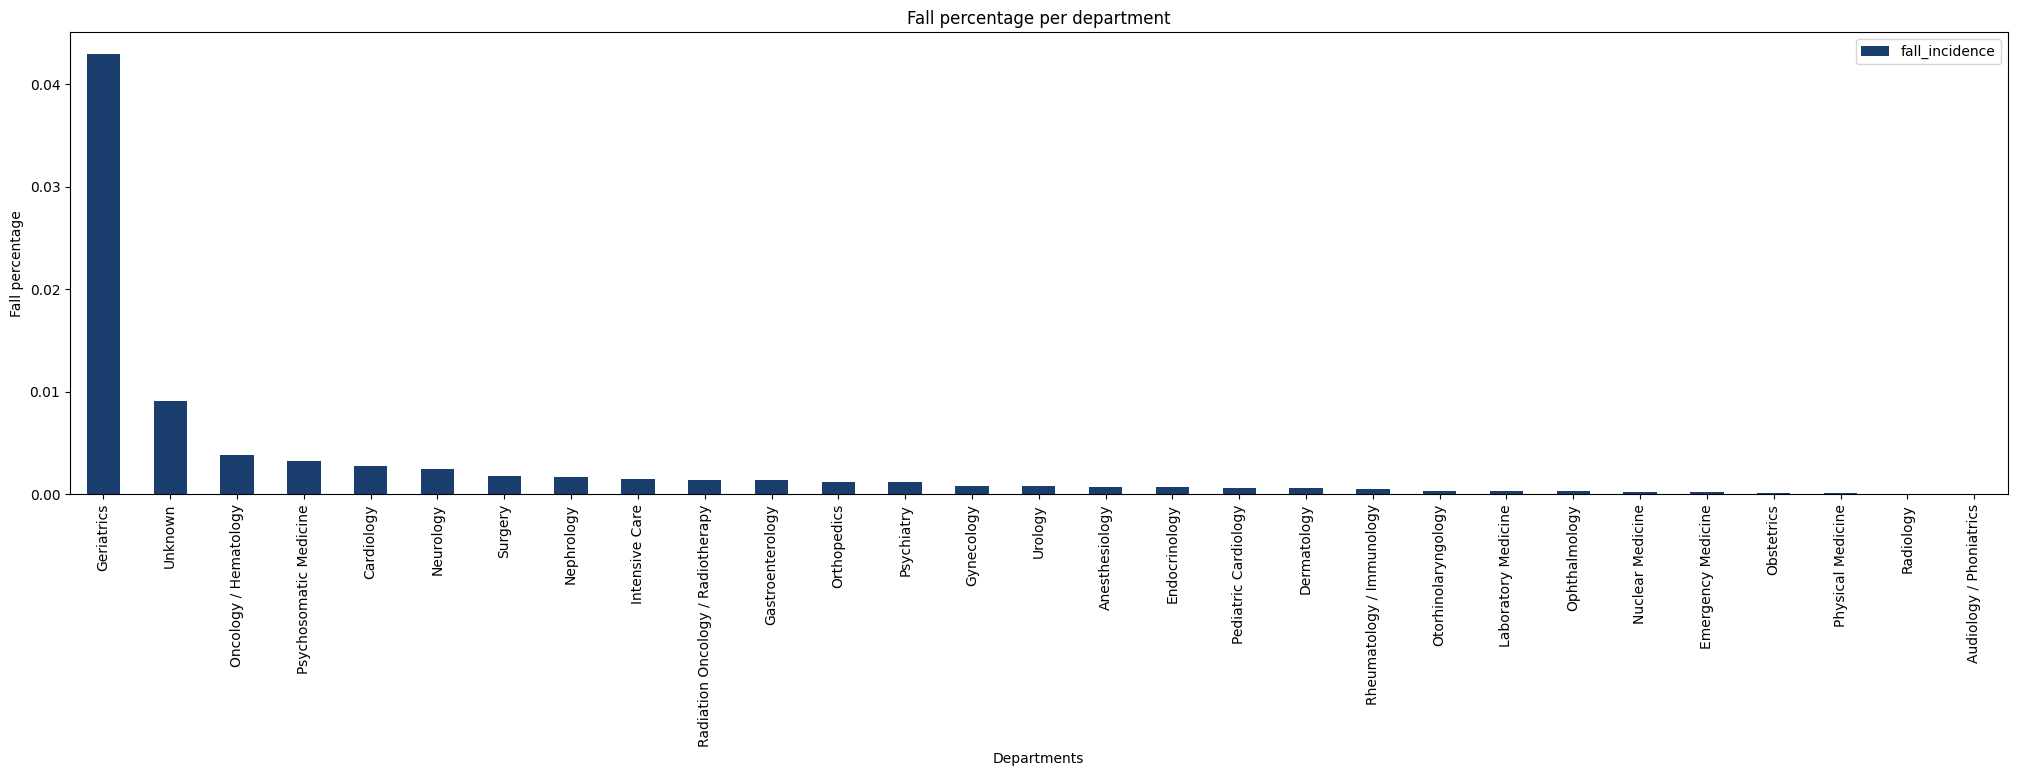

In [81]:
fig, ax = plt.subplots(figsize=(25, 6)) 

fallsPerDep.sort_values('fall_incidence',ascending=False).plot(x='department',y='fall_incidence',kind='bar',ax=ax, color=color_01)


#plot horizontal line after at over  5% of falls
#ax.axhline(y=0.05, color=color_contrast1, linestyle='--', label='50%')

plt.legend()

plt.xlabel("Departments")
plt.ylabel("Fall percentage")
plt.title("Fall percentage per department")


plt.show()

In [82]:
#falls per 1000 admissions
fallsPerDep['fall_1000_admissions'] = fallsPerDep['number_of_falls']/fallsPerDep['number_of_cases']*1000

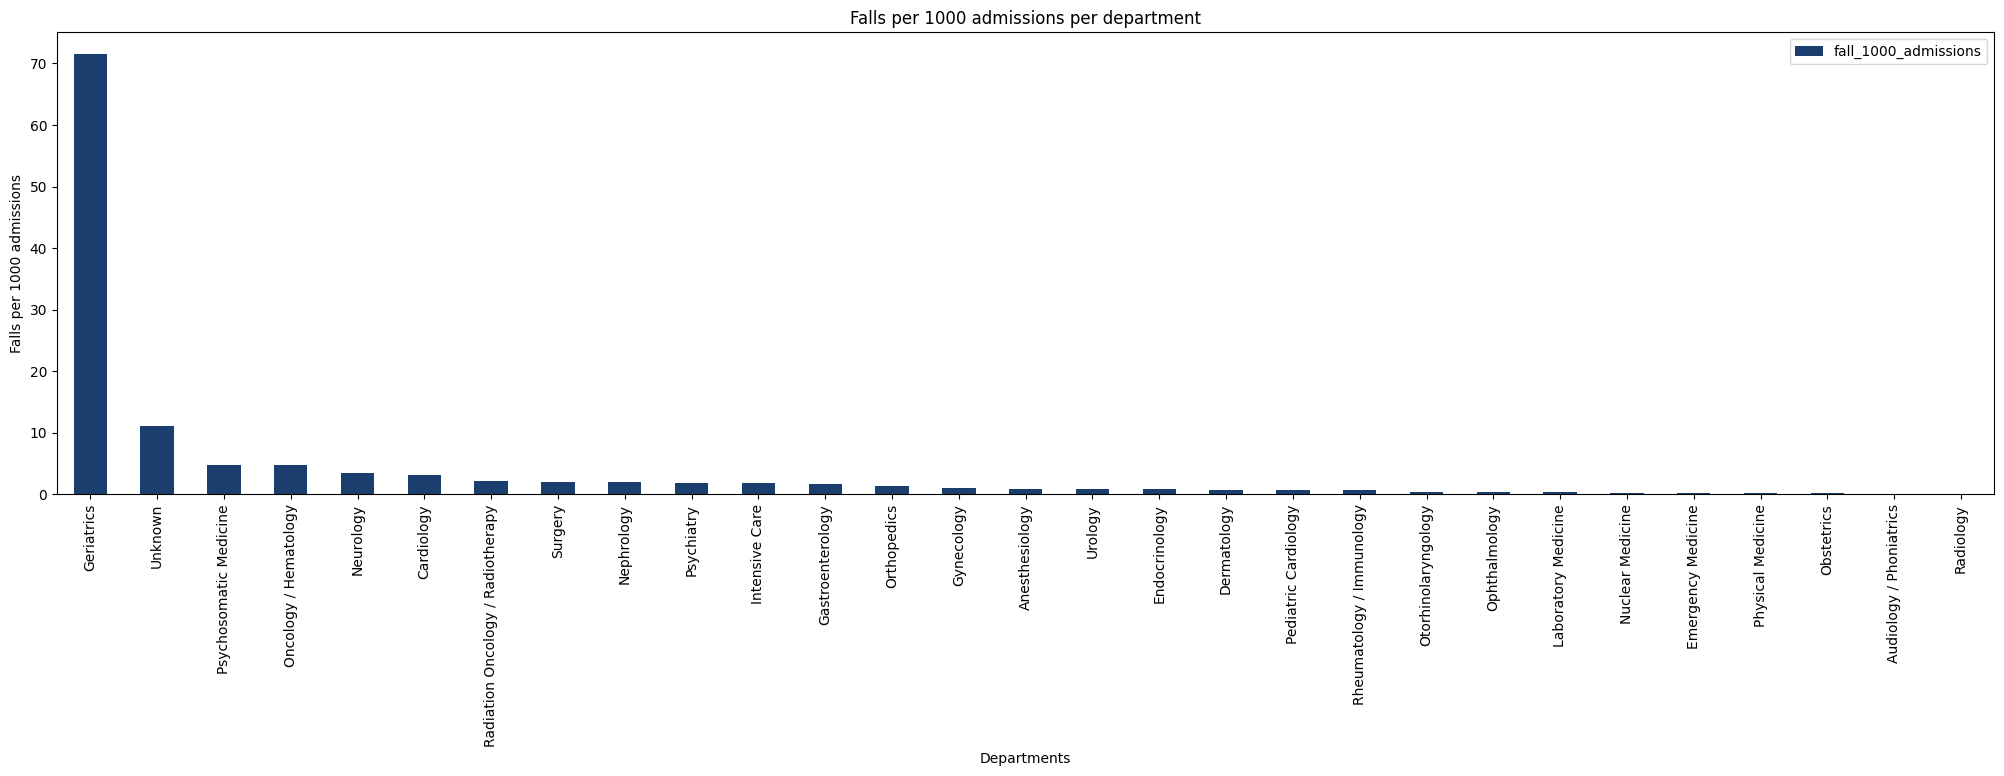

In [83]:
fig, ax = plt.subplots(figsize=(25, 6)) 

fallsPerDep.sort_values('fall_1000_admissions',ascending=False).plot(x='department',y='fall_1000_admissions',kind='bar',ax=ax, color=color_01)


#plot horizontal line after at over  5% of falls
#ax.axhline(y=0.05, color=color_contrast1, linestyle='--', label='50%')

plt.legend()

plt.xlabel("Departments")
plt.ylabel("Falls per 1000 admissions")
plt.title("Falls per 1000 admissions per department")


plt.show()

In [84]:
fallsPerDep['fall_per_1000_patient_days_avg'] = fallsPerDep['fall_1000_admissions']/7.5
# source https://www.oecd.org/en/data/indicators/length-of-hospital-stay.html?oecdcontrol-0ad85c6bab-var1=DEU&oecdcontrol-b84ba0ecd2-var3=2022

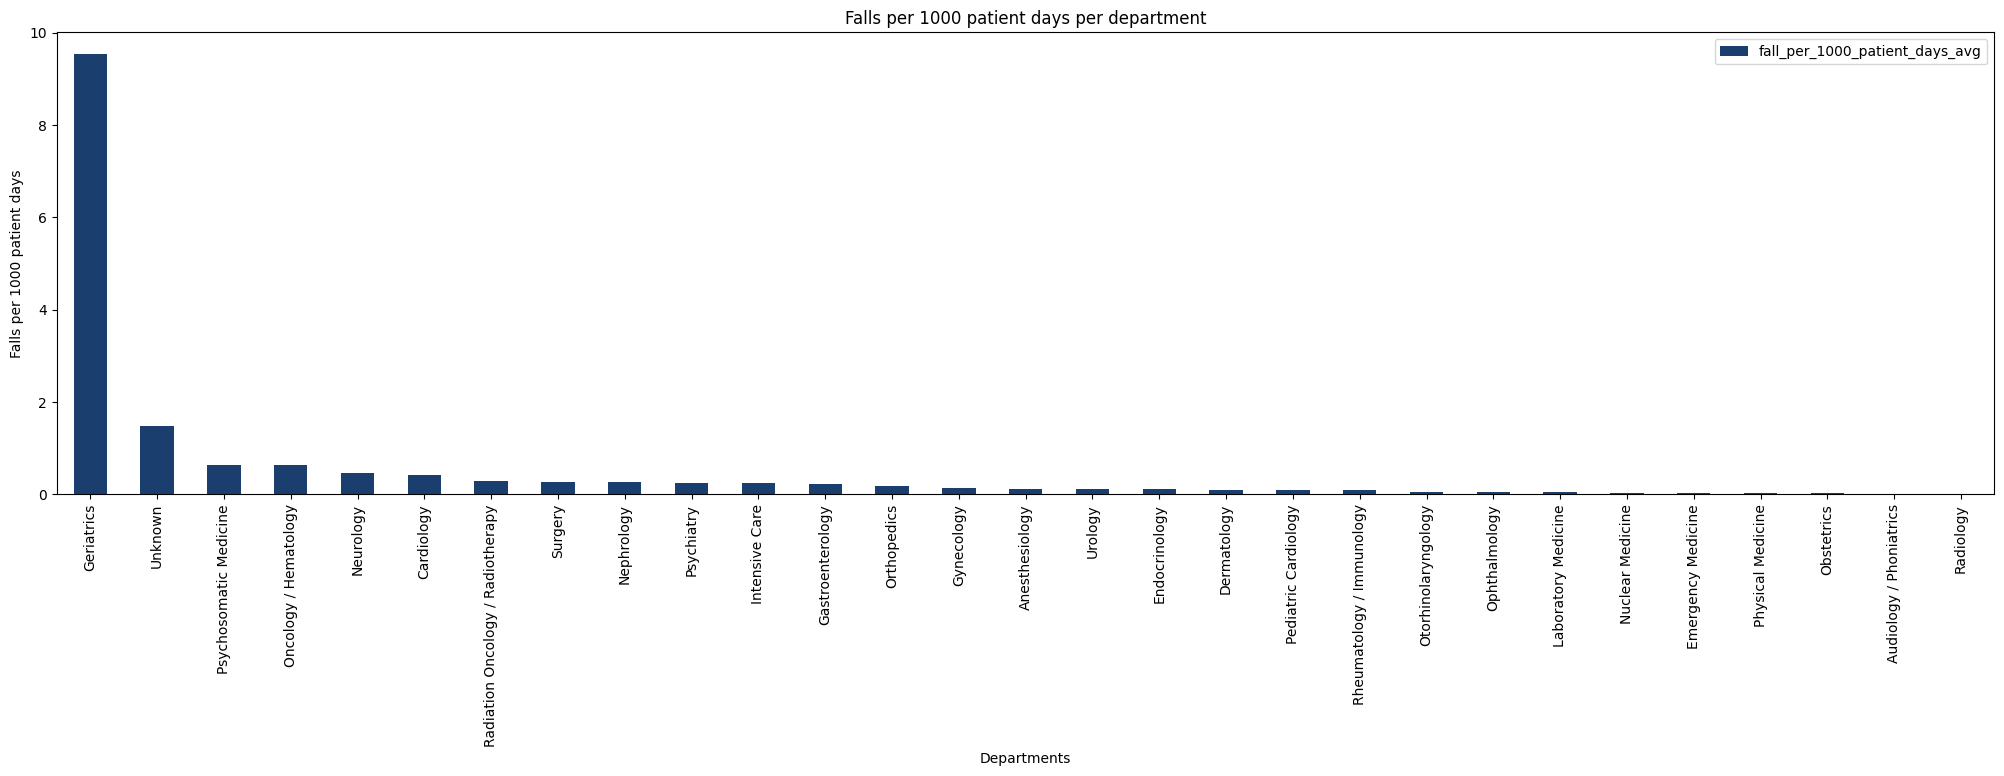

In [85]:
fig, ax = plt.subplots(figsize=(25, 6)) 

fallsPerDep.sort_values('fall_per_1000_patient_days_avg',ascending=False).plot(x='department',y='fall_per_1000_patient_days_avg',kind='bar',ax=ax, color=color_01)


#plot horizontal line after at over  5% of falls
#ax.axhline(y=0.05, color=color_contrast1, linestyle='--', label='50%')

plt.legend()

plt.xlabel("Departments")
plt.ylabel("Falls per 1000 patient days")
plt.title("Falls per 1000 patient days per department")


plt.show()

### Preparation for Priority list 01

In [86]:
# generate dataframe for importance indicator
importance_indicator = fallsPerDep.copy() 

In [87]:
# Add fall ratio, where proportion_of_falls = number of falls in dep/ total number of falls
importance_indicator['proportion_of_falls'] = importance_indicator['number_of_falls']/importance_indicator['number_of_falls'].sum()

<span style="color:green"> 

## Classification

### Topic: 

**Findings:** 

There are 17 departments that account for 50% of all falls. In addition, there are 3 departments in which more than 5% of cases have a fall incident. 

**Implications (for care):** 

Those 17 + 3 (perhaps duplicates) could be looked at in more detail and counter measures could be implemented

**Limitations and justification:**


</span>


# P03

*How do the occorrence of falls varry across time?*

Analysis for:
- S01: Variation across time all departments
- S02: Variation across time by departments

## S01

*Variation across time all departments*

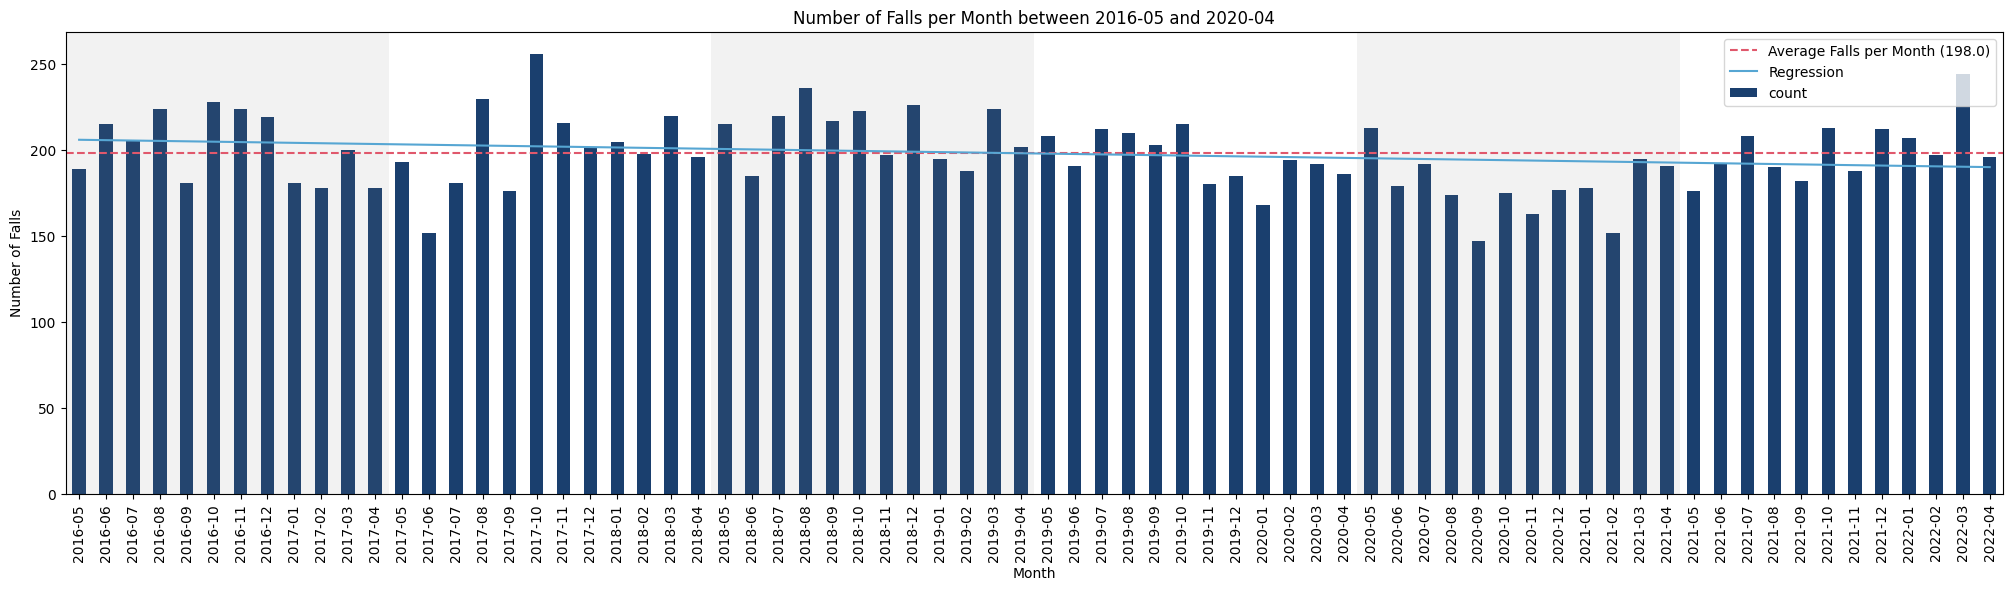

In [88]:
# group Sturz_datetime_converted by year and month and plot the number of falls
falls_per_month = fallD.copy()

falls_per_month['year-month'] = falls_per_month['Sturz_datetime_converted'].dt.strftime('%Y-%m')

fig, ax = plt.subplots(figsize=(25, 6))

# Create the bar plot
monthly_falls = falls_per_month['year-month'].value_counts().sort_index()
monthly_falls.plot(kind='bar', ax=ax, color =color_01)

# Add average line
average_falls_per_month = monthly_falls.mean()
ax.axhline(y=average_falls_per_month, color=color_contrast1, linestyle='--',
           label='Average Falls per Month (' + str(round(average_falls_per_month,0)) + ')')


#linear regression
x = np.arange(len(monthly_falls))
y = monthly_falls.values

# Generating a second-order polynomial regression model
e = np.polyfit(x, y, 1)
p = np.poly1d(e)

#plot regression
plt.plot(x, p(x), color=color_03, label='Regression')

# Make groups of 12 months grey and 12 months white
num_bars = len(monthly_falls)
group_size = 12

for i in range((num_bars // group_size) + 1):
    if i % 2 == 0:  # Only color every alternate group
        ax.axvspan(i * group_size - 0.5, (i + 1) * group_size - 0.5, facecolor='grey', alpha=0.1)


# Add legend and labels
plt.legend()
plt.xlabel("Month")
plt.ylabel("Number of Falls")
plt.title("Number of Falls per Month between 2016-05 and 2020-04")

plt.show()


<span style="color:green"> 

## Classification

### Topic: Case distribution over time in all departments

**Findings:** 

The number of falls is very consistent over time with 1898 falls per month. However, there is a slight downward trend, meaning that the average number of falls has decreased over time.
**Implications (for care):** 

The topic of inpatient falls has reamined the same importance in 2022 then it had in 2016

**Limitations and justification:**

The data does not take into account the total number of patients per year and does not give an answer as to whether or not the percentage of patients that fall or rise.
</span>


## S02

*Variation across time by department*


Analyzing the Trend

In [89]:
# Create a complete date range from 2016-05 to 2022-04
complete_date_range = pd.date_range(start='2016-05-01', end='2022-04-30', freq='MS')
complete_date_range_str = complete_date_range.strftime('%Y-%m')

# Group by department and year-month and count the occurrences
falls_per_month_grouped = falls_per_month.groupby(['Fachliche Zuweisung', 'year-month']).size().reset_index(name='monthly_falls').sort_values('monthly_falls',ascending=True)

In [90]:
# Create a DataFrame with all combinations of Fachliche Zuweisung and year-month
all_combinations = []
for fachliche_zuweisung in falls_per_month_grouped['Fachliche Zuweisung'].unique():
    for year_month in complete_date_range_str:
        all_combinations.append((fachliche_zuweisung, year_month))

complete_df = pd.DataFrame(all_combinations, columns=['Fachliche Zuweisung', 'year-month'])

In [91]:
# Merge with falls_per_month_grouped to include all combinations and fill missing ones with 0
falls_per_month_grouped = falls_per_month_grouped.merge(complete_df, on=['Fachliche Zuweisung', 'year-month'], how='right')
falls_per_month_grouped['monthly_falls'].fillna(0, inplace=True)
falls_per_month_grouped.sort_values(['Fachliche Zuweisung', 'year-month'], inplace=True)


/var/folders/_v/9sq5h7j92hj_c44txqz68s7w0000gn/T/ipykernel_72069/4061603692.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  falls_per_month_grouped['monthly_falls'].fillna(0, inplace=True)


In [92]:
dep_weighted_trend = pd.DataFrame(columns=['department', 'fall_trend','coeffs','regression_line'])  # Initialize an empty DataFrame


In [93]:

for department in falls_per_month_grouped['Fachliche Zuweisung'].unique():
    department_data = falls_per_month_grouped[falls_per_month_grouped['Fachliche Zuweisung'] == department]

    # Calculate polynomial regression (second-order)
    x_numeric = np.arange(len(department_data))
    y = department_data['monthly_falls']
    coeffs = np.polyfit(x_numeric, y, 2)
    poly = np.poly1d(coeffs)
    regression_line = poly(x_numeric)

    # Calculate the derivative of the polynomial at the last point
    derivatives = np.polyder(poly)(x_numeric)

    num_data_points = len(derivatives)

    # Create a DataFrame with the x_numeric, the regression_line and the derivatives
    regression_df = pd.DataFrame({'x_numeric': x_numeric, 'regression_line': regression_line, 'derivatives': derivatives})
    regression_df = regression_df.rename(columns={'x_numeric':'x_value','regression_line': 'regression_value','derivatives':'derivative_value'})   
    # Calculate the weighted derivative for each point by dividing the derivative by 1/(n-x)
    regression_df['fall_trend'] = regression_df['derivative_value'] * 1/(num_data_points - regression_df['x_value'])

    # Sum the weighted derivatives to get the total for this department
    fall_trend_sum = regression_df['fall_trend'].sum()


    # Append the result to dep_weighted_trend
    dep_weighted_trend = pd.concat([dep_weighted_trend, pd.DataFrame({'department': [department], 'fall_trend': [fall_trend_sum], 'coeffs':[coeffs], 'regression_line': [regression_line]})], ignore_index=True)


/var/folders/_v/9sq5h7j92hj_c44txqz68s7w0000gn/T/ipykernel_72069/110611662.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dep_weighted_trend = pd.concat([dep_weighted_trend, pd.DataFrame({'department': [department], 'fall_trend': [fall_trend_sum], 'coeffs':[coeffs], 'regression_line': [regression_line]})], ignore_index=True)


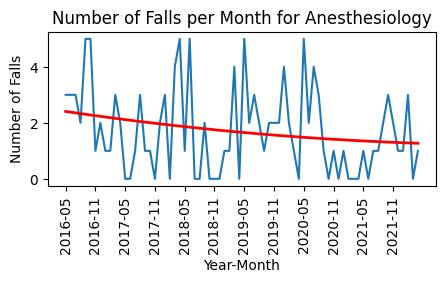

In [94]:
from matplotlib.ticker import MaxNLocator

# Create a complete date range from 2016-05 to 2022-04
complete_date_range = pd.date_range(start='2016-05-01', end='2022-04-30', freq='MS')
complete_date_range_str = complete_date_range.strftime('%Y-%m')

# Group by department and year-month and count the occurrences
falls_per_month_grouped = falls_per_month.groupby(['Fachliche Zuweisung', 'year-month']).size().reset_index(name='monthly_falls').sort_values('year-month',ascending=False)


# For each department, plot the number of falls per month in a separate plot of the size 5x2 with each having x-axis as year-month and y-axis as number of falls all dates from 2016-05 to 2022-04, only show every 6th month
for department in falls_per_month_grouped['Fachliche Zuweisung'].unique():

    if department != 'Anesthesiology':
        continue

    # Filter the data for the department
    department_data = falls_per_month_grouped[falls_per_month_grouped['Fachliche Zuweisung'] == department]
    
    # Create a DataFrame with all months in the date range and merge with department data
    all_months_df = pd.DataFrame({'year-month': complete_date_range_str})
    department_data = all_months_df.merge(department_data, on='year-month', how='left').fillna(0)
    department_data['monthly_falls'] = department_data['monthly_falls'].astype(int)

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(5, 2))

    # Plot the data
    department_data.plot(x='year-month', y='monthly_falls', kind='line', ax=ax, legend=None)

    # Calculate polynomial regression (second-order)
    x_numeric = np.arange(len(department_data))
    y = department_data['monthly_falls']
    coeffs = np.polyfit(x_numeric, y, 2)
    poly = np.poly1d(coeffs)
    regression_line = poly(x_numeric)



    # Calculate the derivative of the polynomial at the last point
    derivatives = np.polyder(poly)(x_numeric)

    num_data_points = len(derivatives)

    # Create a DataFrame with the x_numeric, the regression_line and the derivatives
    regression_df = pd.DataFrame({'x_numeric': x_numeric, 'regression_line': regression_line, 'derivatives': derivatives})
    regression_df = regression_df.rename(columns={'x_numeric':'x_value','regression_line': 'regression_value','derivatives':'derivative_value'})   
    # Calculate the weighted derivative for each point by dividing the derivative by 1/(n-x)
    regression_df['weighted_derivate'] = regression_df['derivative_value'] * 1/(num_data_points -regression_df['x_value'])

    if regression_df['weighted_derivate'].sum()>0:
        print(department, ': increasing trend.')
    # Plot the polynomial regression line

    ax.plot(department_data['year-month'], regression_line, color='red', linestyle='-', linewidth=2, label='Polynomial Regression')

    # Set the title and labels
    plt.title(f'Number of Falls per Month for {department}')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Falls')

    # Show every 6th month on the x-axis
    plt.xticks(ticks=range(0, len(complete_date_range_str), 6), labels=complete_date_range_str[::6], rotation=90)

    # Ensure y-axis only shows integers and a maximum of 5 values
    ax.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=5))

    plt.show()

### Preparation for Priority list 02

In [95]:
#add derivate
importance_indicator = pd.merge(importance_indicator,dep_weighted_trend[['department','fall_trend']], on='department', how='left')

<span style="color:green"> 

## Classification

### Topic: 

**Findings:** 

The `dep_weighted_trend' dataframe contains enough data to plot a polinomial correlation for each department, showing the trend of the falls. It also contains a weighted derivative sum that provides information about the current trend (2022).

**Implications (for care):** 

One could analyze what the trend is for a particular department.


**Limitations and justification:**

The `fall_trend' is weighted with 1/(n-x), which means that the oldest element is only 1/n and the newest element is 1. This could lead to older trends not being taken into account sufficiently.

</span>


# P04

*How do severity of falls vary across different clinical departments?*

Analysis for:
- S01: Fall severity across faller depatments
- S02: Build adequate severity indicator for each department
- S02: Correlate indicator and number of falls with each injury


In [96]:
fallD['Grad der Verletzung'].value_counts()

Grad der Verletzung
keine     10645
gering     2471
mäßig       926
schwer      218
Name: count, dtype: int64

In [97]:
#create dataframe with only relevant columns (department, severity of fall, case id)
falls_severity = fallD[['Fachliche Zuweisung','Grad der Verletzung','c_pseudonym']].copy() 

# for each Fachliche Zuweisung, calculate the number of falls with each severity level in a separate column add number of falls per department
falls_severity = falls_severity.pivot_table(index='Fachliche Zuweisung', columns='Grad der Verletzung', values='c_pseudonym', aggfunc='count', fill_value=0).reset_index()

In [98]:
#rename columns
falls_severity.columns = ['department','minor_injury','no_injury','moderate_injury','major_injury']
#add number of falls per department
falls_severity = pd.merge(falls_severity,dep_cases_falls, on='department', how='left').drop(columns=['Group']).sort_values('number_of_falls', ascending=False)

# falls_severity to pickel
falls_severity.to_pickle('data/out/falls_severity.pkl')

In [99]:
#print percentage of injuty severity overalls
print('Percentage of falls with no injury: ',round(falls_severity['no_injury'].sum()/numFalls*100,2))
print('Percentage of falls with minor injury: ',round(falls_severity['minor_injury'].sum()/numFalls*100,2))
print('Percentage of falls with moderate injury: ',round(falls_severity['moderate_injury'].sum()/numFalls*100,2))
print('Percentage of falls with major injury: ',round(falls_severity['major_injury'].sum()/numFalls*100,2))


Percentage of falls with no injury:  74.65
Percentage of falls with minor injury:  17.33
Percentage of falls with moderate injury:  6.49
Percentage of falls with major injury:  1.53


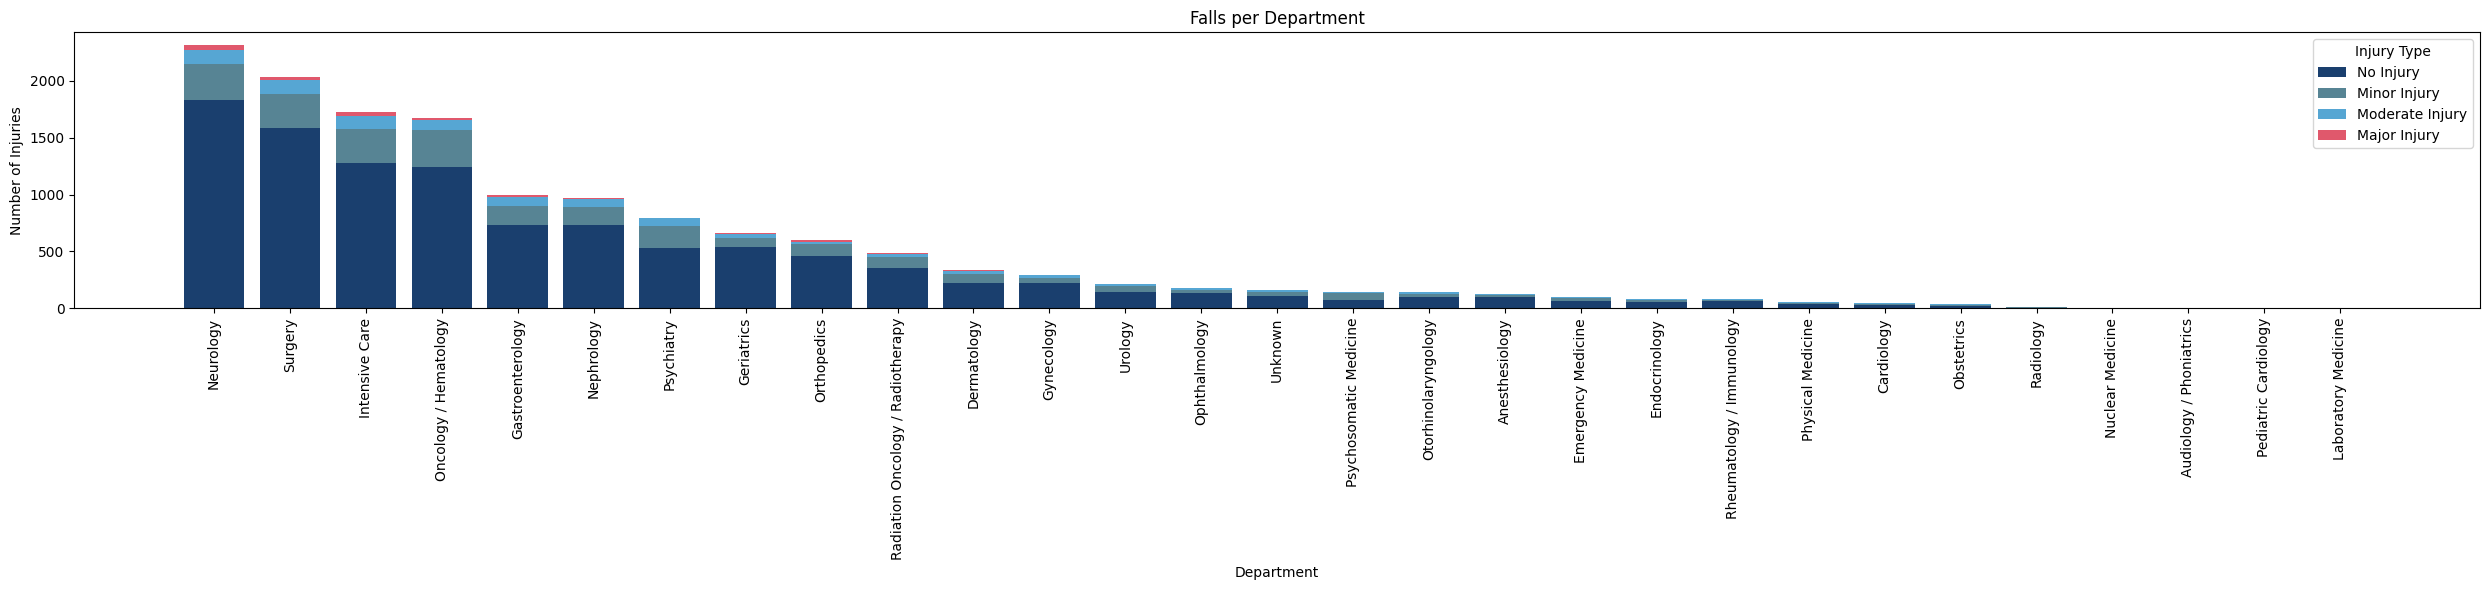

In [100]:
falls_severity = falls_severity.sort_values(['number_of_falls','major_injury','moderate_injury','minor_injury','no_injury'], ascending=False)


x = falls_severity['department']
y = [falls_severity['no_injury'],falls_severity['minor_injury'],falls_severity['moderate_injury'],falls_severity['major_injury']]
names = ['No Injury', 'Minor Injury', 'Moderate Injury', 'Major Injury']
col = [color_01, color_04, color_03, color_contrast1]

# Plotting a grouped bar chart with stacked segments
fig, ax = plt.subplots(figsize=(25, 6))

ax.bar(x, y[0], color=col[0], label='No Injury')
ax.bar(x, y[1], bottom=y[0], color=col[1], label='Minor Injury')
ax.bar(x, y[2], bottom=y[0]+y[1], color=col[2], label='Moderate Injury')
ax.bar(x, y[3], bottom=y[0]+y[1]+y[2], color=col[3], label='Major Injury')


# Adding labels and title
ax.set_xlabel('Department')
ax.set_ylabel('Number of Injuries')
ax.set_title('Falls per Department')
ax.set_xticks(range(len(falls_severity['department'])))
ax.set_xticklabels(falls_severity['department'], rotation=90)
ax.legend(title='Injury Type')

plt.tight_layout()
plt.show()



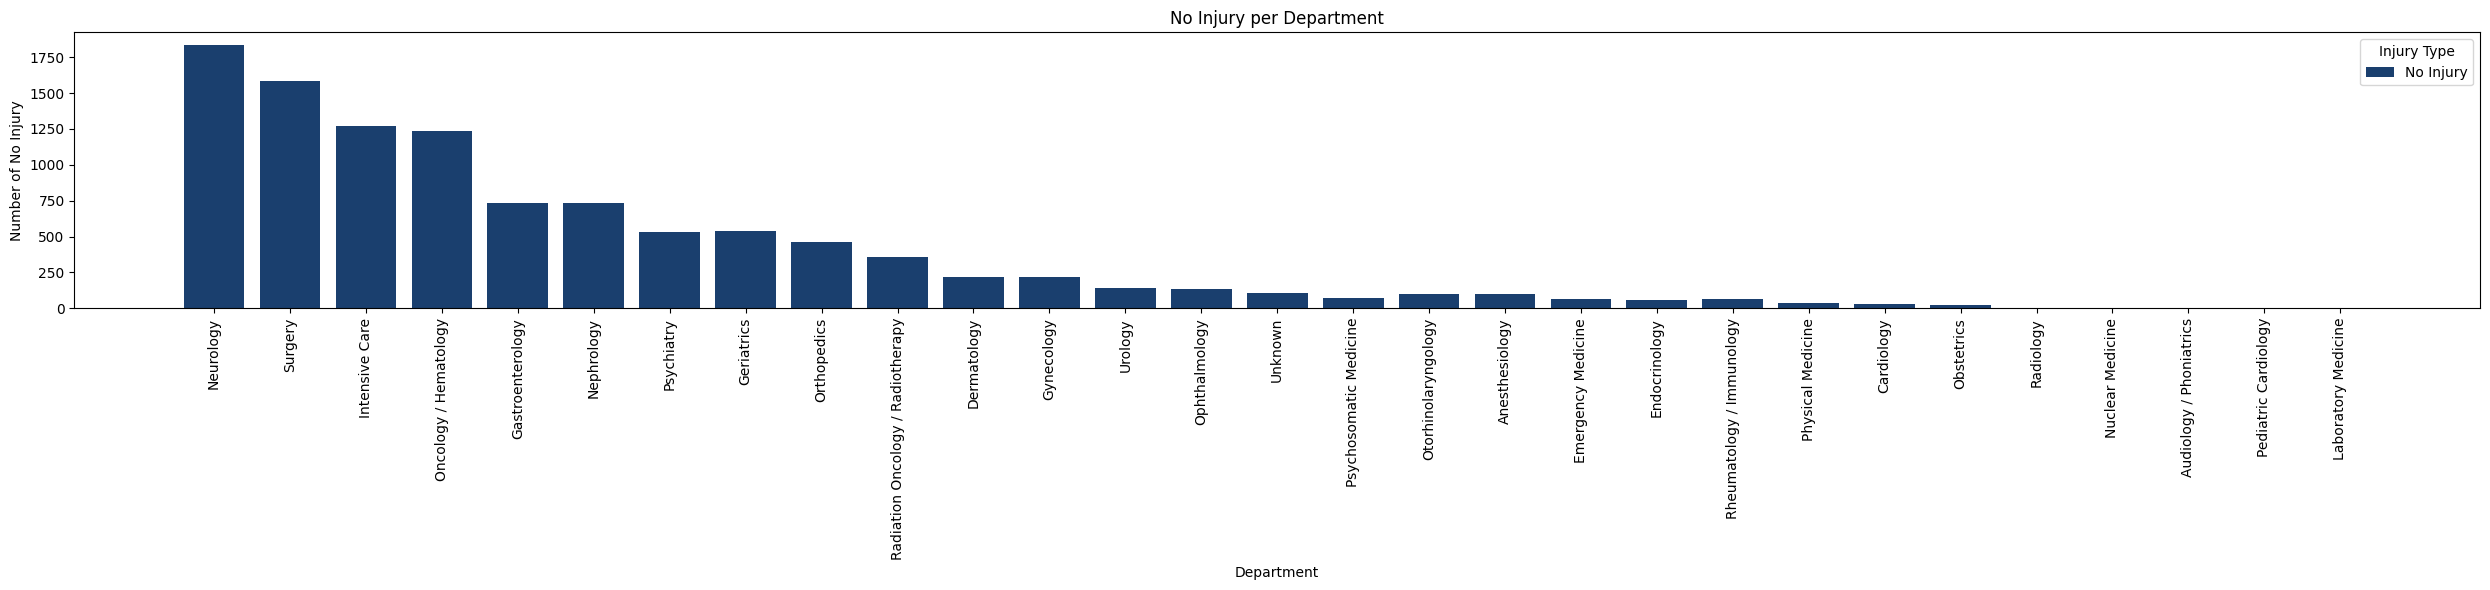

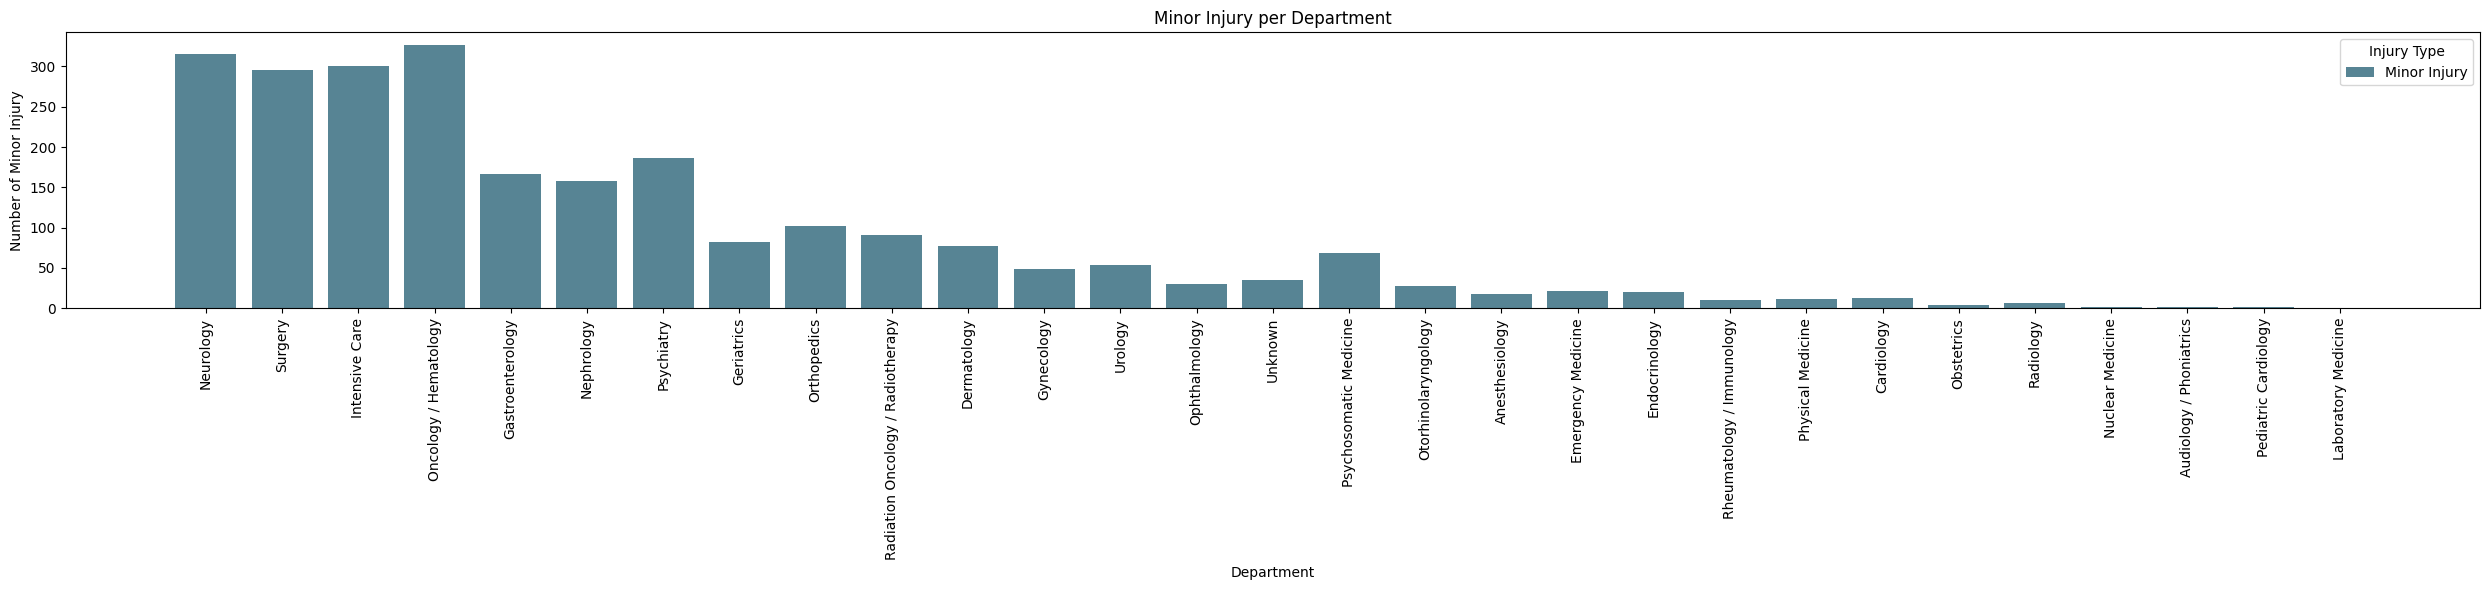

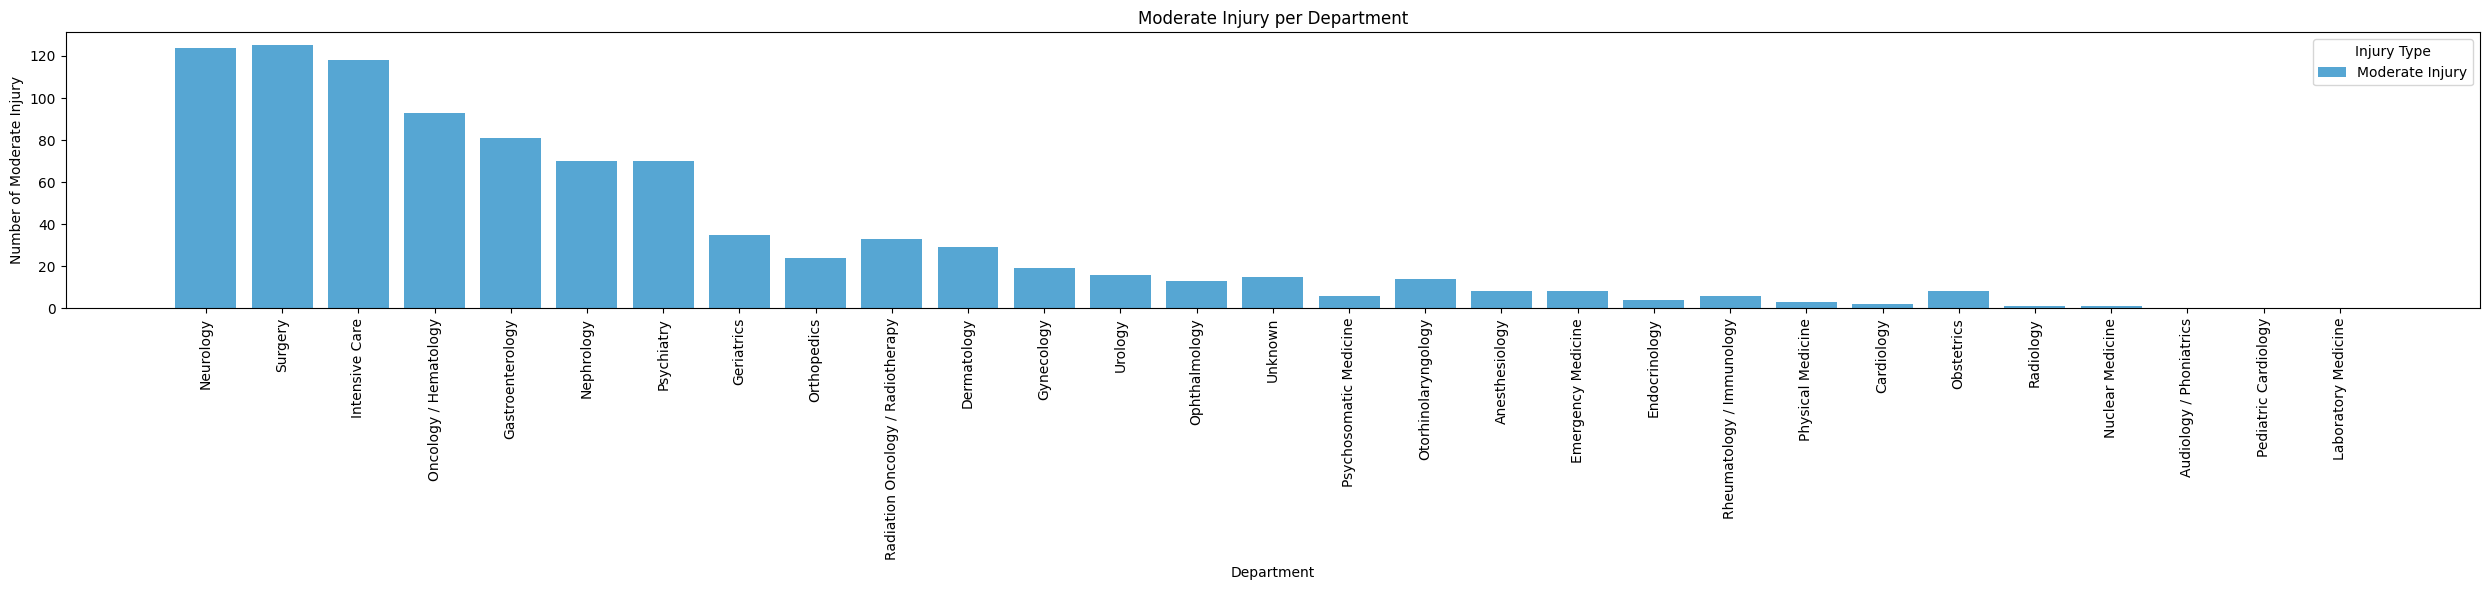

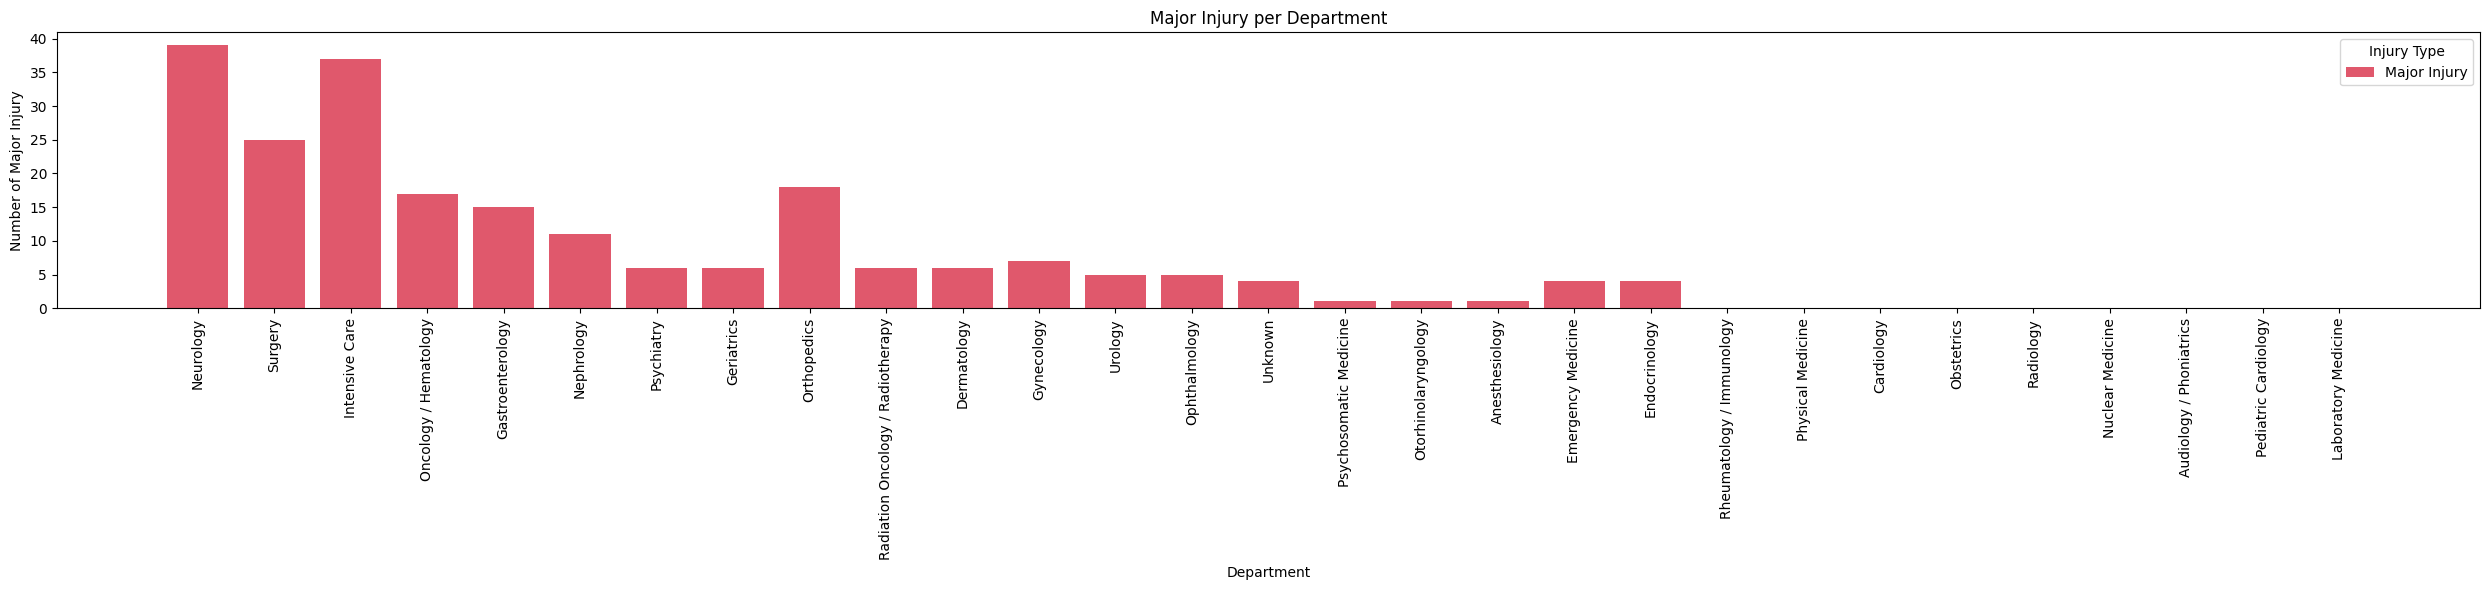

In [101]:
falls_severity = falls_severity.sort_values(['number_of_falls','major_injury','moderate_injury','minor_injury','no_injury'], ascending=False)


for num in range(len(y)):
    # Plotting a grouped bar chart with stacked segments
    fig, ax = plt.subplots(figsize=(25, 6))

    ax.bar(x, y[num], color=col[num], label=names[num])

    # Adding labels and title
    ax.set_xlabel('Department')
    ax.set_ylabel('Number of '+ names[num])
    ax.set_title(names[num]+' per Department')
    ax.set_xticks(range(len(falls_severity['department'])))
    ax.set_xticklabels(falls_severity['department'], rotation=90)
    ax.legend(title='Injury Type')

    plt.tight_layout()
    plt.show()

<span style="color:green"> 

## Classification

### Topic: 

**Findings:** 

Severe falls only account for 1.52% of all falls, while the main occurrence are falls with minor injuries.

Falls with major injuries tend to occur in departments with more falls. However, the distribution of major falls in any department with more than 200 falls does not follow a trend.

**Implications (for care):** 

Most falls are not a major problem.

**Limitations and justification:**

none
</span>


### Preparation for Priority list 03

In [102]:
# weighted injury severity
f_1_w = 1
f_2_w = 2
f_3_w = 8
f_4_w = 20

In [103]:
falls_severity['weighted_injury_severity']  = (falls_severity['no_injury']*f_1_w + falls_severity['minor_injury']*f_2_w + falls_severity['moderate_injury']*f_3_w + falls_severity['major_injury']*f_4_w)/falls_severity['number_of_falls']


In [104]:
importance_indicator = pd.merge(importance_indicator,falls_severity[['department','weighted_injury_severity']], on='department', how='left')

# P05

*Development of priority list*



<span style="color:red"> 


</span>

In [105]:
importance_indicator['number_of_falls'].sum()/importance_indicator['number_of_falls'].count()

491.7241379310345

In [106]:
# filter dataset so that only departments with at least N of falls are included
N = 200
importance_indicator_filtered = importance_indicator[importance_indicator['number_of_falls'] >= N].copy().sort_values('number_of_falls', ascending=False)

In [107]:
# number of falls in department divided by number of falls total
# normalize the proportion_of_falls so that smallest value becomes 0 and largest 1
fr = importance_indicator_filtered['proportion_of_falls']
importance_indicator_filtered['proportion_of_falls_normed'] = (fr - fr.min()) / (fr.max() - fr.min())

# number of falls in department divided by number of cases in department
# normalize the dep1_fall_incidence so that smallest value becomes 0 and largest 1
fp = importance_indicator_filtered['fall_incidence']
importance_indicator_filtered['fall_incidence_normed'] = (fp - fp.min()) / (fp.max() - fp.min())


# trend of falls over time
# normalize the fall_trend so that smallest value becomes 0 and largest 1
wd = importance_indicator_filtered['fall_trend']
importance_indicator_filtered['fall_trend_normed'] = (wd - wd.min()) / (wd.max() - wd.min())

# weighted injury severity
# normalize the weighted_injury_severity so that smallest value becomes 0 and largest 1
ws = importance_indicator_filtered['weighted_injury_severity']
importance_indicator_filtered['weighted_injury_severity_normed'] = (ws - ws.min()) / (ws.max() - ws.min())

In [108]:
#weights between 0 and 1
fall_incidence_weight = 1
proportion_of_falls_weight = 1
fall_trend_weight = 1
weighted_injury_severity_weight = 1

In [109]:
#build the importance indicator
importance_indicator_filtered['PRIORITY'] = ((importance_indicator_filtered['fall_incidence_normed']*fall_incidence_weight 
                                             + importance_indicator_filtered['proportion_of_falls_normed']*proportion_of_falls_weight 
                                             + importance_indicator_filtered['fall_trend_normed']*fall_trend_weight
                                             + importance_indicator_filtered['weighted_injury_severity_normed']*weighted_injury_severity_weight)
                                            /(fall_incidence_weight+proportion_of_falls_weight+fall_trend_weight+weighted_injury_severity_weight)
                                            *100)

importance_indicator_filtered = importance_indicator_filtered.sort_values('PRIORITY',ascending=False)

In [110]:
# get top three departments with highest importance indicator
top_three_dep = importance_indicator_filtered.head(3)

/var/folders/_v/9sq5h7j92hj_c44txqz68s7w0000gn/T/ipykernel_72069/2626250370.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(importance_indicator_filtered['department'], rotation=90)


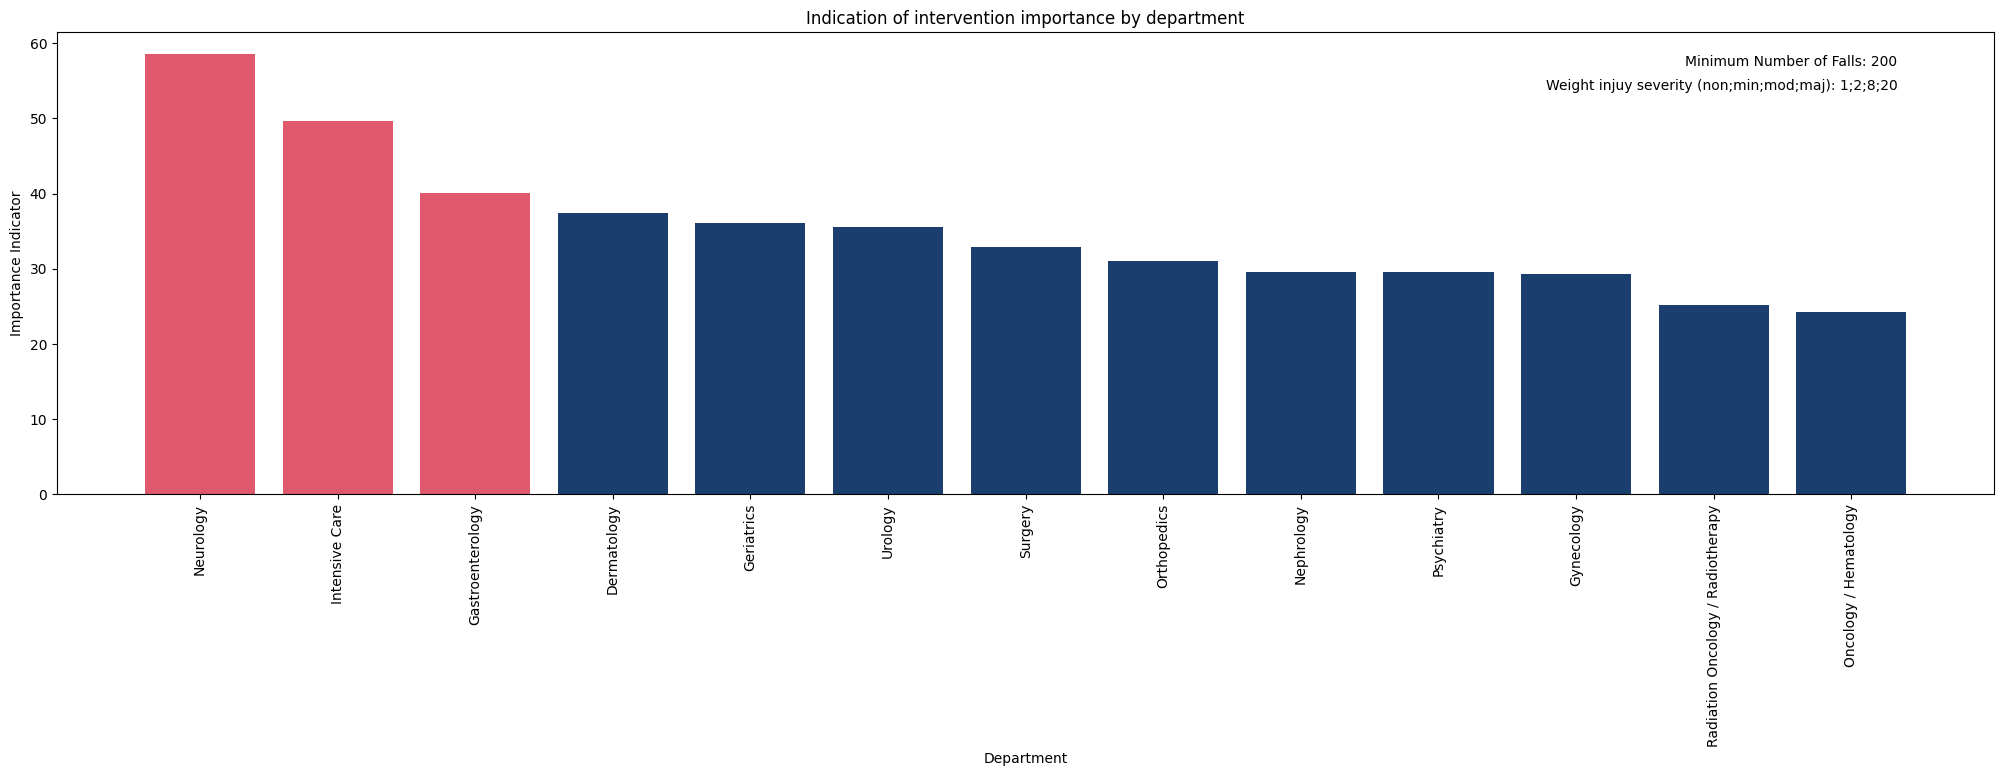

The three departments with the highest importance indicator are:  ['Neurology', 'Intensive Care', 'Gastroenterology']


In [111]:
# Define colormap
colors = [color_01, color_contrast1]

max_value = importance_indicator_filtered['PRIORITY'].max()
min_value = importance_indicator_filtered['PRIORITY'].min()
diff_value = max_value - min_value

# Function to get color based on value
# def get_color(value):
#     if value-min_value < 0.25*diff_value:
#         return colors[0]
#     elif value-min_value < 0.5*diff_value:
#         return colors[1]
#     elif value-min_value < 0.75*diff_value:
#         return colors[2]
#     else:
#         return colors[4]
    
# Function to get color based on department
def get_color(department):
    if department in top_three_dep['department'].to_list():
        return colors[1]
    else:
        return colors[0]

# Apply colormap to the bar plot
fig, ax1 = plt.subplots(figsize=(25, 6))

colors_applied = [get_color(val) for val in importance_indicator_filtered['department']]
ax1.bar(importance_indicator_filtered['department'], importance_indicator_filtered['PRIORITY'], color=colors_applied)
ax1.set_xlabel('Department')
ax1.set_ylabel('Importance Indicator')



ax1.set_xticklabels(importance_indicator_filtered['department'], rotation=90)

# Adding a title
plt.title('Indication of intervention importance by department')

#plot weights as text top right
plt.text(0.95, 0.95, 'Minimum Number of Falls: '+str(N), horizontalalignment='right', verticalalignment='top', transform=ax1.transAxes)
plt.text(0.95, 0.90, 'Weight injuy severity (non;min;mod;maj): '+str(f_1_w)+";"+str(f_2_w)+";"+str(f_3_w)+";"+str(f_4_w), horizontalalignment='right', verticalalignment='top', transform=ax1.transAxes)

plt.show()

print('The three departments with the highest importance indicator are: ',top_three_dep['department'].to_list())


In [112]:
top_three_dep.to_pickle('data/out/top_three_dep.pkl')


<span style="color:green"> 

## Classification

### Topic: 

**Findings:** 

There are a handful of departments with significant intervention importance.

**Implications (for care):** 

Interventions should be prioritized in the departments with high `PRIORITY`.

**Limitations and justification:**

The weights are not based on scientific evidence and may need to be adjusted after consultation with nurses and other experts.
</span>


# stats

In [113]:
importance_indicator_filtered

,index,department,number_of_cases,number_of_falls,number_cases_falling,fall_incidence,fall_1000_admissions,fall_per_1000_patient_days_avg,proportion_of_falls,fall_trend,weighted_injury_severity,proportion_of_falls_normed,fall_incidence_normed,fall_trend_normed,weighted_injury_severity_normed,PRIORITY
5,2,Neurology,679513,2311,1644,0.002419,3.400965,0.453462,0.162062,2.500967,1.832973,1.000000,0.043223,1.000000,0.298835,58.551457
8,1,Intensive Care,940927,1730,1435,0.001525,1.838612,0.245148,0.121318,0.548708,2.057803,0.722938,0.022088,0.537448,0.706548,49.725534
10,3,Gastroenterology,589914,994,814,0.001380,1.684991,0.224666,0.069705,0.685601,2.024145,0.371960,0.018656,0.569882,0.645510,40.150216
18,7,Dermatology,482665,332,285,0.000590,0.687848,0.091713,0.023282,0.392033,2.186747,0.056271,0.000000,0.500327,0.940376,37.424345
0,30,Geriatrics,9230,660,396,0.042904,71.505959,9.534128,0.046283,-0.740125,1.668182,0.212685,1.000000,0.232083,0.000000,36.119182
14,15,Urology,261871,214,200,0.000764,0.817196,0.108960,0.015007,0.042799,2.219626,0.000000,0.004095,0.417582,1.000000,35.541923
6,0,Surgery,1003622,2031,1741,0.001735,2.023670,0.269823,0.142426,-1.019971,1.809946,0.866476,0.027042,0.165778,0.257078,32.909355
11,9,Orthopedics,428910,603,527,0.001229,1.405889,0.187452,0.042286,0.026664,2.014925,0.185503,0.015083,0.413759,0.628792,31.078429
7,6,Nephrology,489333,971,798,0.001631,1.984334,0.264578,0.068093,0.003899,1.882595,0.360992,0.024586,0.408366,0.388822,29.569130
12,8,Psychiatry,430154,797,519,0.001207,1.852825,0.247043,0.055891,-0.446482,1.992472,0.278016,0.014560,0.301656,0.588074,29.557647


In [114]:
stats_table = pd.DataFrame(columns=['department','number_of_cases','number_of_falls', 'fall_rate_1000_adm','fall_incidence_1000_pat_adys',
                                    'females_perc','males_perc',
                                    'age_average','age_sd','age_<=65','age_66-75','age_76-85','age_>85',
                                    'time_07-15','time_15-23','time_23-07',
                                    'injury_no','injury_minor','injury_moderate','injury_major','injury_with','Proportion of Falls Normed','Fall Incidence Normed','Fall Trend Normed','Weighted Injury Severity Normed','Priority'])

In [115]:
# total
total_cases = falls_severity['number_of_cases'].sum()
total_falls = falls_severity['number_of_falls'].sum()


agg_row = {
    'department': 'Total',
    'number_of_cases': total_cases,
    'number_of_falls': total_falls,
    'fall_rate_1000_adm': total_falls / total_cases * 1000,
    'fall_incidence_1000_pat_adys': (total_falls / total_cases * 1000) / 7.5,
    'females_perc': fallD['Geschlecht'].value_counts(normalize=True).get('w', 0),
    'males_perc': fallD['Geschlecht'].value_counts(normalize=True).get('m', 0),
    'age_average': fallD['Alter'].mean(),
    'age_sd': fallD['Alter'].std(),
    'age_<=65': fallD['Alter'].lt(66).mean(),
    'age_66-75': fallD['Alter'].between(66, 75).mean(),
    'age_76-85': fallD['Alter'].between(76, 85).mean(),
    'age_>85': fallD['Alter'].ge(86).mean(),
    'time_07-15': fallD['Hour'].between(7, 14).mean(),
    'time_15-23': fallD['Hour'].between(15, 22).mean(),
    'time_23-07': 1 - (fallD['Hour'].between(7, 14).mean() + fallD['Hour'].between(15, 22).mean()),
    'injury_no': falls_severity['no_injury'].sum() / total_falls,
    'injury_minor': falls_severity['minor_injury'].sum() / total_falls,
    'injury_moderate': falls_severity['moderate_injury'].sum() / total_falls,
    'injury_major': falls_severity['major_injury'].sum() / total_falls,
    'injury_with': 1 - (falls_severity['no_injury'].sum() / total_falls)
}

# Append the aggregated row to the stats_table
stats_table = pd.concat([stats_table, pd.DataFrame([agg_row])], ignore_index=True)


/var/folders/_v/9sq5h7j92hj_c44txqz68s7w0000gn/T/ipykernel_72069/607869448.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_table = pd.concat([stats_table, pd.DataFrame([agg_row])], ignore_index=True)


In [116]:
dep_cases_falls_in_view= falls_severity[falls_severity['number_of_falls']>=200]

for i, department in enumerate(dep_cases_falls_in_view['department']):
# Initialize a dictionary with columns from stats_table and default values
        department_row = dep_cases_falls_in_view[dep_cases_falls_in_view['department'] == department].iloc[0]
        fallD_dep = fallD[fallD['Fachliche Zuweisung'] == department]
        departmentRow = {
        'department': department,
        'number_of_cases': department_row['number_of_cases'],
        'fall_rate_1000_adm': None,
        'fall_incidence_1000_pat_adys': None,
        'number_of_falls': department_row['number_of_falls'],
        'females_perc': None,
        'males_perc': None,
        'age_average': None,
        'age_sd': None,
        'age_<=65': None,
        'age_66-75': None,
        'age_76-85': None,
        'age_>85': None,
        'time_07-15': None,
        'time_15-23': None,
        'time_23-07': None,
        'injury_no': None,
        'injury_minor': None,
        'injury_moderate': None,
        'injury_major': None,
        'injury_with': None,
        'Proportion of Falls Normed': None,
        'Fall Incidence Normed': None,
        'Fall Trend Normed': None,
        'Weighted Injury Severity Normed': None,
        'Priority': None
        }

        # Get normalized value counts
        m,w = fallD_dep['Geschlecht'].value_counts(normalize=True).reindex(['m', 'w'], fill_value=0)
        departmentRow['females_perc'] = w
        departmentRow['males_perc'] = m

        # Calculate fall rate per 1000 admissions
        departmentRow['fall_rate_1000_adm'] = department_row['number_of_falls']/department_row['number_of_cases']*1000

        # Calculate fall incidence per 1000 patient days
        departmentRow['fall_incidence_1000_pat_adys'] = departmentRow['fall_rate_1000_adm']/7.5

        # Calculate Mean Age
        departmentRow['age_average'] = fallD_dep['Alter'].mean()
        departmentRow['age_sd'] = fallD_dep['Alter'].std()

        # Calculate age groups
        departmentRow['age_<=65'] = fallD_dep['Alter'].lt(66).mean()
        departmentRow['age_66-75'] = fallD_dep['Alter'].between(66, 75).mean()
        departmentRow['age_76-85'] = fallD_dep['Alter'].between(76, 85).mean()
        departmentRow['age_>85'] = fallD_dep['Alter'].ge(86).mean()

        # Calculate time of day
        departmentRow['time_07-15'] = fallD_dep['Hour'].between(7, 14).sum()/fallD_dep.shape[0]
        departmentRow['time_15-23'] = fallD_dep['Hour'].between(15, 22).sum()/fallD_dep.shape[0]
        departmentRow['time_23-07'] = 1-(departmentRow['time_07-15']+departmentRow['time_15-23'])


        # Calculate injury severity
        departmentRow['injury_no'] = department_row['no_injury']/department_row['number_of_falls']
        departmentRow['injury_minor'] = department_row['minor_injury']/department_row['number_of_falls']
        departmentRow['injury_moderate'] = department_row['moderate_injury']/department_row['number_of_falls']
        departmentRow['injury_major'] = department_row['major_injury']/department_row['number_of_falls']
        departmentRow['injury_with'] = 1-(departmentRow['injury_no'])


        # get importance indicator
        importance_indicator_filtered_row = importance_indicator_filtered[importance_indicator_filtered['department'] == department].iloc[0]
        departmentRow['Proportion of Falls Normed'] = importance_indicator_filtered_row['proportion_of_falls_normed']
        departmentRow['Fall Incidence Normed'] = importance_indicator_filtered_row['fall_incidence_normed']
        departmentRow['Fall Trend Normed'] = importance_indicator_filtered_row['fall_trend_normed']
        departmentRow['Weighted Injury Severity Normed'] = importance_indicator_filtered_row['weighted_injury_severity_normed']
        departmentRow['Priority'] = importance_indicator_filtered_row['PRIORITY']

        # Append the row to the stats_table
        stats_table = pd.concat([stats_table, pd.DataFrame([departmentRow])], ignore_index=True)


/var/folders/_v/9sq5h7j92hj_c44txqz68s7w0000gn/T/ipykernel_72069/4067081471.py:80: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_table = pd.concat([stats_table, pd.DataFrame([departmentRow])], ignore_index=True)


In [117]:
stats_table = stats_table.sort_values('number_of_cases', ascending=False)

In [118]:
# Filter the data for departments with fewer than 200 falls
dep_cases_falls_below_view = falls_severity[falls_severity['number_of_falls'] < 200]

# Aggregate the data for departments with fewer than 200 falls
total_cases = dep_cases_falls_below_view['number_of_cases'].sum()
total_falls = dep_cases_falls_below_view['number_of_falls'].sum()

fallD_below = fallD[fallD['Fachliche Zuweisung'].isin(dep_cases_falls_below_view['department'])]

agg_row = {
    'department': 'Other (<200 falls)',
    'number_of_cases': total_cases,
    'number_of_falls': total_falls,
    'fall_rate_1000_adm': total_falls / total_cases * 1000,
    'fall_incidence_1000_pat_adys': (total_falls / total_cases * 1000) / 7.5,
    'females_perc': fallD_below['Geschlecht'].value_counts(normalize=True).get('w', 0),
    'males_perc': fallD_below['Geschlecht'].value_counts(normalize=True).get('m', 0),
    'age_average': fallD_below['Alter'].mean(),
    'age_sd': fallD_below['Alter'].std(),
    'age_<=65': fallD_below['Alter'].lt(66).mean(),
    'age_66-75': fallD_below['Alter'].between(66, 75).mean(),
    'age_76-85': fallD_below['Alter'].between(76, 85).mean(),
    'age_>85': fallD_below['Alter'].ge(86).mean(),
    'time_07-15': fallD_below['Hour'].between(7, 14).mean(),
    'time_15-23': fallD_below['Hour'].between(15, 22).mean(),
    'time_23-07': 1 - (fallD_below['Hour'].between(7, 14).mean() + fallD_below['Hour'].between(15, 22).mean()),
    'injury_no': dep_cases_falls_below_view['no_injury'].sum() / total_falls,
    'injury_minor': dep_cases_falls_below_view['minor_injury'].sum() / total_falls,
    'injury_moderate': dep_cases_falls_below_view['moderate_injury'].sum() / total_falls,
    'injury_major': dep_cases_falls_below_view['major_injury'].sum() / total_falls,
    'injury_with': 1 - (dep_cases_falls_below_view['no_injury'].sum() / total_falls)
}

# Append the aggregated row to the stats_table
stats_table = pd.concat([stats_table, pd.DataFrame([agg_row])], ignore_index=True)


In [119]:
# round all percentages to four decimal places and all other values to two decimal places
stats_table = stats_table.round({'fall_rate_1000_adm':2,
                                 'fall_incidence_1000_pat_adys':2,
                                 'females_perc':4,
                                 'males_perc':4,
                                 'age_average':2,
                                 'age_sd':2,
                                 'age_<=65':4,
                                 'age_66-75':4,
                                 'age_76-85':4,
                                 'age_>85':4,
                                 'time_07-15':4,
                                 'time_15-23':4,
                                 'time_23-07':4,
                                 'injury_no':4,
                                 'injury_minor':4,
                                 'injury_moderate':4,
                                 'injury_major':4,
                                 'injury_with':4,
                                 'Proportion of Falls Normed':4,
                                 'Fall Incidence Normed':4,
                                 'Fall Trend Normed':4,
                                 'Weighted Injury Severity Normed':4,
                                 'Priority':2})




In [120]:
# rename columns
stats_table_newNames = stats_table.copy()
stats_table_newNames.columns = ['Department','Department Visits','Falls','Fall Rate (per 1000 Admissions)','Fall Incidence (per 1000 Patient Days)',
                       'Females','Males',
                       'Mean Age','SD Age','Age <=65','Age 66-75','Age 76-85','Age >85',
                       'Day Shift','Evening Shift','Night Shift',
                       'No Injury','Minor Injury','Moderate Injury','Major Injury','Injury With Injury',
                       'Proportion of Falls Normed','Fall Incidence Normed','Fall Trend Normed','Weighted Injury Severity Normed','Priority']

In [121]:
# use comma as decimal separator in the csv file
# transponate stats_table new head is new row 1  
stats_table_t = stats_table_newNames.T
stats_table_t.columns = stats_table_t.iloc[0]
stats_table_t = stats_table_t.applymap(lambda x: str(x).replace('.', ',') if isinstance(x, (int, float)) else x)
stats_table_t.to_csv('data/out/department_stats.csv', index=True, decimal=',', sep=';')



/var/folders/_v/9sq5h7j92hj_c44txqz68s7w0000gn/T/ipykernel_72069/1244704002.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stats_table_t = stats_table_t.applymap(lambda x: str(x).replace('.', ',') if isinstance(x, (int, float)) else x)


In [122]:
# Define a function to format percentages and other numbers
def format_values(val, column):
    if column in ['females_perc', 'males_perc', 'age_<=65', 'age_66-75', 'age_76-85', 'age_>85', 'time_07-15', 'time_15-23', 'time_23-07', 'injury_no', 'injury_minor', 'injury_moderate', 'injury_major', 'injury_with']:
        return f"{val * 100:.2f}\%"
    elif column=='department':
        return val
    elif column in ['number_of_cases', 'number_of_falls']:
        return f"{val:.0f}"
    else:
        return f"{val:.2f}"

# Apply the formatting function to the relevant columns
for column in stats_table.columns:
    stats_table[column] = stats_table[column].apply(lambda x: format_values(x, column))



# rename columns
stats_table.columns = ['Department','Number of Cases','Number of Falls','Fall Rate per 1000 Admissions','Fall Incidence per 1000 Patient Days',
                       'Percentage Females','Percentage Males',
                       'Mean Age','SD Age','Age <=65','Age 66-75','Age 76-85','Age >85',
                       'Time 07:00 to 14:59','Time 15:00 to 22:59','Time 23:00 to 06:59',
                       'No Injury','Minor Injury','Moderate Injury','Major Injury','Injury With Injury',
                       'Proportion of Falls Normed','Fall Incidence Normed','Fall Trend Normed','Weighted Injury Severity Normed','Priority']


# Transpose the table
transposed_table = stats_table.T

<>:4: SyntaxWarning: invalid escape sequence '\%'
<>:4: SyntaxWarning: invalid escape sequence '\%'
/var/folders/_v/9sq5h7j92hj_c44txqz68s7w0000gn/T/ipykernel_72069/815063701.py:4: SyntaxWarning: invalid escape sequence '\%'
  return f"{val * 100:.2f}\%"


In [123]:
transposed_table

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Department,Total,Surgery,Intensive Care,Neurology,Gastroenterology,Nephrology,Dermatology,Psychiatry,Orthopedics,Oncology / Hematology,Gynecology,Urology,Radiation Oncology / Radiotherapy,Geriatrics,Other (<200 falls)
Number of Cases,9085069,1003622,940927,679513,589914,489333,482665,430154,428910,352734,310563,261871,229945,9230,2875688
Number of Falls,14260,2031,1730,2311,994,971,332,797,603,1675,296,214,487,660,1159
Fall Rate per 1000 Admissions,1.57,2.02,1.84,3.40,1.68,1.98,0.69,1.85,1.41,4.75,0.95,0.82,2.12,71.51,0.40
Fall Incidence per 1000 Patient Days,0.21,0.27,0.25,0.45,0.22,0.26,0.09,0.25,0.19,0.63,0.13,0.11,0.28,9.53,0.05
Percentage Females,44.59\%,42.20\%,35.09\%,41.41\%,38.43\%,41.19\%,44.88\%,61.23\%,52.74\%,46.21\%,100.00\%,28.50\%,37.37\%,43.03\%,52.03\%
Percentage Males,55.41\%,57.80\%,64.91\%,58.59\%,61.57\%,58.81\%,55.12\%,38.77\%,47.26\%,53.79\%,0.00\%,71.50\%,62.63\%,56.97\%,47.97\%
Mean Age,72.03,72.39,74.28,73.64,71.00,73.05,76.64,61.96,72.84,69.68,67.51,77.83,71.12,84.42,66.85
SD Age,15.70,14.59,14.60,15.02,15.37,14.40,14.10,19.39,16.06,13.54,16.48,12.21,10.98,8.12,19.85
Age <=65,27.95\%,27.62\%,22.14\%,24.79\%,29.98\%,24.72\%,19.58\%,51.82\%,26.20\%,31.04\%,38.51\%,11.68\%,32.44\%,0.30\%,41.07\%


In [124]:
transposed_table.to_csv('data/out/department_stats_latex.csv', index=True, decimal='.', sep='&')

In [125]:
stats_table_newNames['Department'] = stats_table_newNames['Department'].apply(lambda x: x.replace('/', '/ \n'))

In [126]:
stats_table_newNames = stats_table_newNames.reset_index()

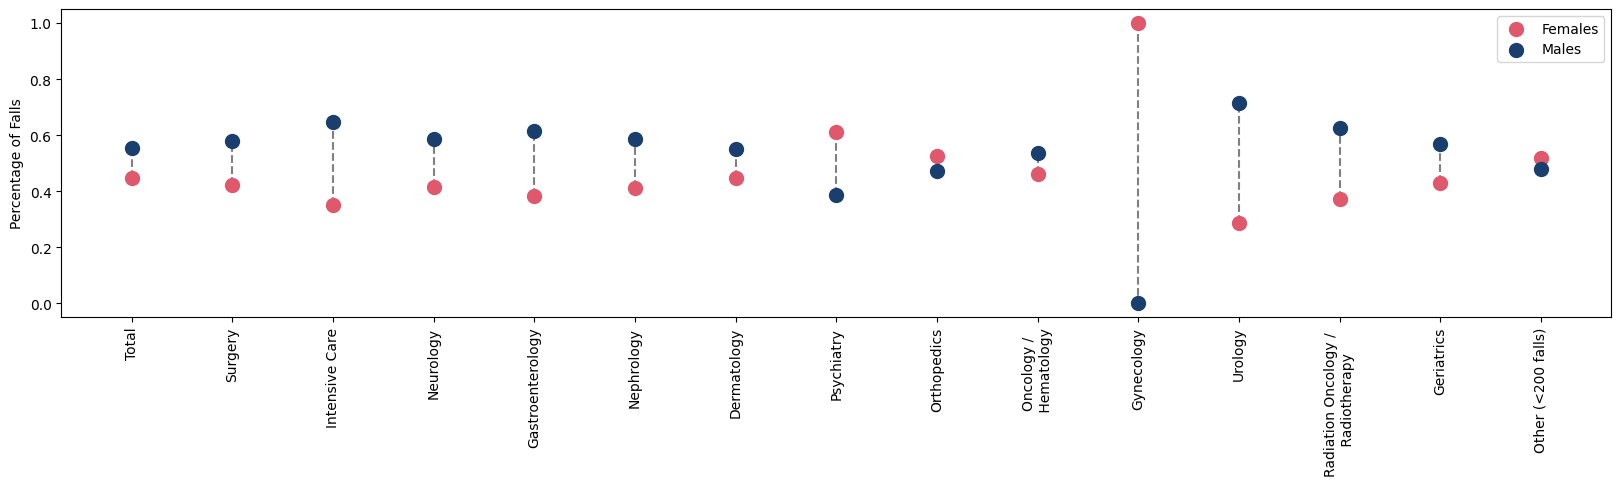

In [127]:
# Assuming you have defined color_01 and color_contrast1, and stats_table_newNames is your dataframe

# Preprocess department labels to split on '/'
departments = stats_table_newNames['Department']

fig, ax = plt.subplots(figsize=(20, 4))

# Connect the dots with lines first
for department in stats_table_newNames['Department']:
    females = stats_table_newNames[stats_table_newNames['Department'] == department]['Females'].values[0]
    males = stats_table_newNames[stats_table_newNames['Department'] == department]['Males'].values[0]
    ax.plot([department, department], [females, males], color='gray', linestyle='--', zorder=1)

# Plot the data for Females
ax.scatter(stats_table_newNames['Department'], stats_table_newNames['Females'], color=color_contrast1, label='Females', s=100, zorder=2)

# Plot the data for Males
ax.scatter(stats_table_newNames['Department'], stats_table_newNames['Males'], color=color_01, label='Males', s=100, zorder=2)

# Rotate x-axis labels and set new labels
ax.set_xticks(stats_table_newNames['Department'])
ax.set_xticklabels(departments, rotation=90)

# Add legend
ax.legend()

# Optionally, add labels and title
#ax.set_xlabel('Department')
ax.set_ylabel('Percentage of Falls')
#ax.set_title('Dot Plot of Females and Males Across Departments')

plt.show()


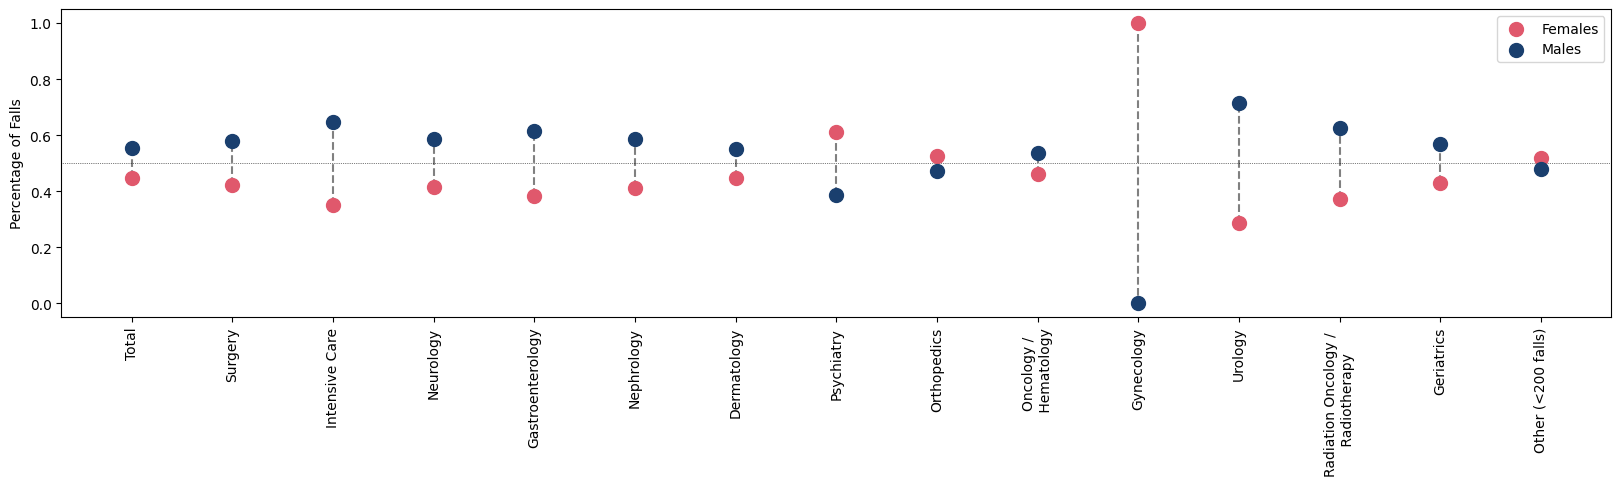

In [128]:
import matplotlib.pyplot as plt

# Assuming color_01 and color_contrast1 are predefined
# Assuming stats_table_newNames is your dataframe

# Preprocess department labels to split on '/'
departments = stats_table_newNames['Department']

fig, ax = plt.subplots(figsize=(20, 4))

# Connect the dots with lines first
for department in stats_table_newNames['Department']:
    females = stats_table_newNames[stats_table_newNames['Department'] == department]['Females'].values[0]
    males = stats_table_newNames[stats_table_newNames['Department'] == department]['Males'].values[0]
    ax.plot([department, department], [females, males], color='gray', linestyle='--', zorder=1)

# Add a subtle dotted line at 0.5
ax.axhline(y=0.5, color='black', linestyle=':', linewidth=0.5, alpha=1)


# Plot the data for Females
ax.scatter(stats_table_newNames['Department'], stats_table_newNames['Females'], color=color_contrast1, label='Females', s=100, zorder=2)

# Plot the data for Males
ax.scatter(stats_table_newNames['Department'], stats_table_newNames['Males'], color=color_01, label='Males', s=100, zorder=2)

# Rotate x-axis labels and set new labels
ax.set_xticks(stats_table_newNames['Department'])
ax.set_xticklabels(departments, rotation=90)


# Add legend
ax.legend()

# Optionally, add labels and title
#ax.set_xlabel('Department')
ax.set_ylabel('Percentage of Falls')
#ax.set_title('Dot Plot of Females and Males Across Departments')

plt.show()


In [129]:
stats_table_newNames

,index,Department,Department Visits,Falls,Fall Rate (per 1000 Admissions),Fall Incidence (per 1000 Patient Days),Females,Males,Mean Age,SD Age,...,No Injury,Minor Injury,Moderate Injury,Major Injury,Injury With Injury,Proportion of Falls Normed,Fall Incidence Normed,Fall Trend Normed,Weighted Injury Severity Normed,Priority
0,0,Total,9085069,14260,1.57,0.21,0.4459,0.5541,72.03,15.70,...,0.7465,0.1733,0.0649,0.0153,0.2535,NaN,NaN,NaN,NaN,NaN
1,1,Surgery,1003622,2031,2.02,0.27,0.4220,0.5780,72.39,14.59,...,0.7809,0.1452,0.0615,0.0123,0.2191,0.8665,0.0270,0.1658,0.2571,32.91
2,2,Intensive Care,940927,1730,1.84,0.25,0.3509,0.6491,74.28,14.60,...,0.7364,0.1740,0.0682,0.0214,0.2636,0.7229,0.0221,0.5374,0.7065,49.73
3,3,Neurology,679513,2311,3.40,0.45,0.4141,0.5859,73.64,15.02,...,0.7927,0.1367,0.0537,0.0169,0.2073,1.0000,0.0432,1.0000,0.2988,58.55
4,4,Gastroenterology,589914,994,1.68,0.22,0.3843,0.6157,71.00,15.37,...,0.7364,0.1670,0.0815,0.0151,0.2636,0.3720,0.0187,0.5699,0.6455,40.15
5,5,Nephrology,489333,971,1.98,0.26,0.4119,0.5881,73.05,14.40,...,0.7539,0.1627,0.0721,0.0113,0.2461,0.3610,0.0246,0.4084,0.3888,29.57
6,6,Dermatology,482665,332,0.69,0.09,0.4488,0.5512,76.64,14.10,...,0.6627,0.2319,0.0873,0.0181,0.3373,0.0563,0.0000,0.5003,0.9404,37.42
7,7,Psychiatry,430154,797,1.85,0.25,0.6123,0.3877,61.96,19.39,...,0.6700,0.2346,0.0878,0.0075,0.3300,0.2780,0.0146,0.3017,0.5881,29.56
8,8,Orthopedics,428910,603,1.41,0.19,0.5274,0.4726,72.84,16.06,...,0.7612,0.1692,0.0398,0.0299,0.2388,0.1855,0.0151,0.4138,0.6288,31.08
9,9,Oncology / \n Hematology,352734,1675,4.75,0.63,0.4621,0.5379,69.68,13.54,...,0.7397,0.1946,0.0555,0.0101,0.2603,0.6967,0.0758,0.0000,0.1957,24.21


/var/folders/_v/9sq5h7j92hj_c44txqz68s7w0000gn/T/ipykernel_72069/790046204.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data[age_columns] = age_data[age_columns].div(


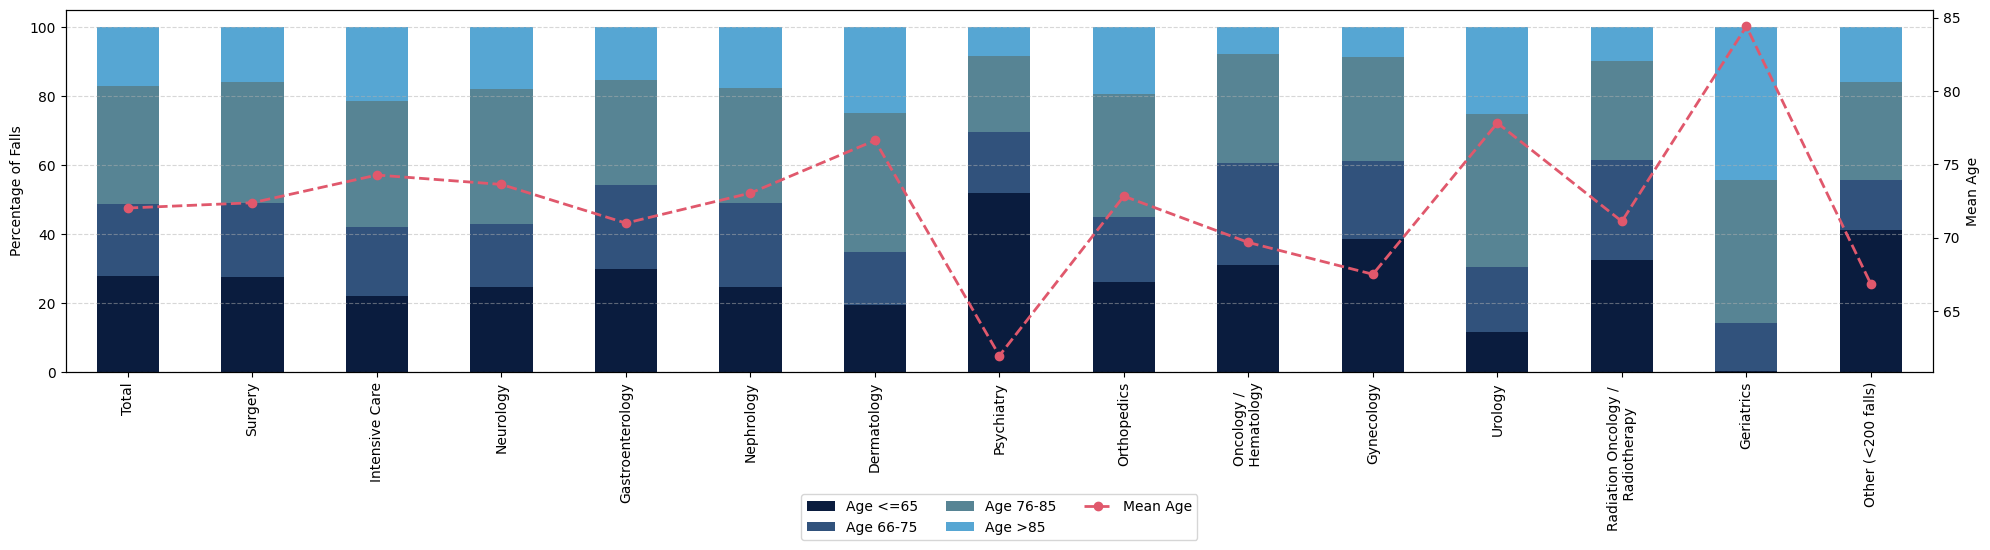

In [130]:
# Specify the age group columns
age_columns = ['Age <=65', 'Age 66-75', 'Age 76-85', 'Age >85']

# Filter the DataFrame to include only the relevant columns
age_data = stats_table_newNames[['Department'] + age_columns]
age_average = stats_table_newNames[['Department', 'Mean Age']]

# If the data is not in percentages, normalize it
age_data[age_columns] = age_data[age_columns].div(
    age_data[age_columns].sum(axis=1), axis=0
) * 100

# Set the 'Department' column as the index for easier plotting
age_data.set_index('Department', inplace=True)
age_average.set_index('Department', inplace=True)

# Plot the data
fig, ax1 = plt.subplots(figsize=(20, 6))


import matplotlib.colors as mcolors
color_01_light = mcolors.to_rgba(color_01, alpha=0.9)  # 30% transparency



# Bar plot for age distribution
age_data_plot = age_data.plot(kind='bar', stacked=True, ax=ax1, color=[color_dark, color_01_light, color_04, color_03])

# Create a secondary y-axis for the Mean Age
ax2 = ax1.twinx()
line_plot = ax2.plot(age_average.index, age_average['Mean Age'], color=color_contrast1, marker='o', linestyle='--', linewidth=2, label='Mean Age')

# Add labels and title
ax1.set_xlabel('')
ax1.set_ylabel('Percentage of Falls')
#ax1.set_title('Age Distribution by Department with Mean Age')
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Retrieve handles and labels for the legends
bar_handles, bar_labels = ax1.get_legend_handles_labels()
# Retrieve handles and labels for the line plot
line_handles, line_labels = ax2.get_legend_handles_labels()

# Combine legends from both plots
handles = bar_handles + line_handles
labels = bar_labels + line_labels

# Add legend below the plot
ax1.legend(handles=handles, labels=labels, loc='center', bbox_to_anchor=(0.5, -0.4), ncol=3)

# Add legend for the line plot
ax2.set_ylabel('Mean Age')

# Adjust layout to make room for the legend
plt.tight_layout()

# Show plot
plt.show()


In [131]:
pd.set_option('display.max_columns', None)

stats_table_newNames

,index,Department,Department Visits,Falls,Fall Rate (per 1000 Admissions),Fall Incidence (per 1000 Patient Days),Females,Males,Mean Age,SD Age,Age <=65,Age 66-75,Age 76-85,Age >85,Day Shift,Evening Shift,Night Shift,No Injury,Minor Injury,Moderate Injury,Major Injury,Injury With Injury,Proportion of Falls Normed,Fall Incidence Normed,Fall Trend Normed,Weighted Injury Severity Normed,Priority
0,0,Total,9085069,14260,1.57,0.21,0.4459,0.5541,72.03,15.70,0.2795,0.2093,0.3409,0.1703,0.3271,0.3300,0.3428,0.7465,0.1733,0.0649,0.0153,0.2535,NaN,NaN,NaN,NaN,NaN
1,1,Surgery,1003622,2031,2.02,0.27,0.4220,0.5780,72.39,14.59,0.2762,0.2137,0.3525,0.1576,0.3309,0.3269,0.3422,0.7809,0.1452,0.0615,0.0123,0.2191,0.8665,0.0270,0.1658,0.2571,32.91
2,2,Intensive Care,940927,1730,1.84,0.25,0.3509,0.6491,74.28,14.60,0.2214,0.1983,0.3676,0.2127,0.3058,0.3179,0.3763,0.7364,0.1740,0.0682,0.0214,0.2636,0.7229,0.0221,0.5374,0.7065,49.73
3,3,Neurology,679513,2311,3.40,0.45,0.4141,0.5859,73.64,15.02,0.2479,0.1822,0.3907,0.1791,0.3509,0.3704,0.2787,0.7927,0.1367,0.0537,0.0169,0.2073,1.0000,0.0432,1.0000,0.2988,58.55
4,4,Gastroenterology,589914,994,1.68,0.22,0.3843,0.6157,71.00,15.37,0.2998,0.2414,0.3058,0.1529,0.2676,0.3380,0.3944,0.7364,0.1670,0.0815,0.0151,0.2636,0.3720,0.0187,0.5699,0.6455,40.15
5,5,Nephrology,489333,971,1.98,0.26,0.4119,0.5881,73.05,14.40,0.2472,0.2420,0.3357,0.1751,0.3172,0.3131,0.3697,0.7539,0.1627,0.0721,0.0113,0.2461,0.3610,0.0246,0.4084,0.3888,29.57
6,6,Dermatology,482665,332,0.69,0.09,0.4488,0.5512,76.64,14.10,0.1958,0.1536,0.4006,0.2500,0.3584,0.3072,0.3343,0.6627,0.2319,0.0873,0.0181,0.3373,0.0563,0.0000,0.5003,0.9404,37.42
7,7,Psychiatry,430154,797,1.85,0.25,0.6123,0.3877,61.96,19.39,0.5182,0.1769,0.2208,0.0841,0.4003,0.3689,0.2309,0.6700,0.2346,0.0878,0.0075,0.3300,0.2780,0.0146,0.3017,0.5881,29.56
8,8,Orthopedics,428910,603,1.41,0.19,0.5274,0.4726,72.84,16.06,0.2620,0.1874,0.3566,0.1940,0.3118,0.3085,0.3798,0.7612,0.1692,0.0398,0.0299,0.2388,0.1855,0.0151,0.4138,0.6288,31.08
9,9,Oncology / \n Hematology,352734,1675,4.75,0.63,0.4621,0.5379,69.68,13.54,0.3104,0.2961,0.3146,0.0788,0.3003,0.3087,0.3910,0.7397,0.1946,0.0555,0.0101,0.2603,0.6967,0.0758,0.0000,0.1957,24.21


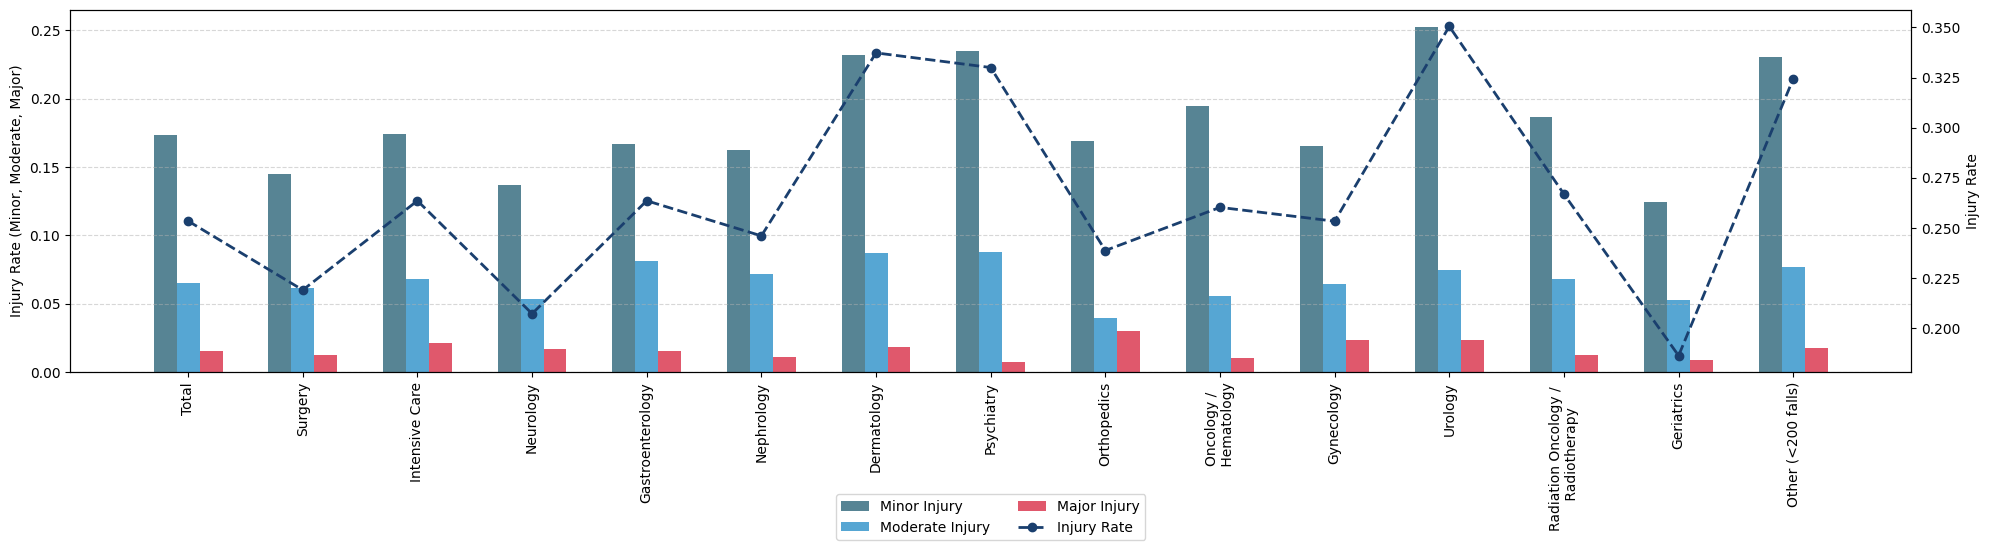

In [133]:
color_no_injury = color_01          # No Injury
color_minor_injury = color_04      # Minor Injury
color_moderate_injury = color_03    # Moderate Injury
color_major_injury = color_contrast1      # Major Injury



# Define the columns to plot
columns_to_plot = ['Minor Injury', 'Moderate Injury', 'Major Injury']

# Set the width of the bars and the positions of the bars
bar_width = 0.2
departments = stats_table_newNames['Department']
positions = range(len(departments))

# Calculate the center positions for the bars
center_positions = [p + bar_width * (len(columns_to_plot) - 1) / 2 for p in positions]

# Create the plot
fig, ax1 = plt.subplots(figsize=(20, 6))

# Plot bars for each injury type on the first y-axis
for i, column in enumerate(columns_to_plot):
    ax1.bar([p + i * bar_width for p in positions], 
            stats_table_newNames[column], 
            width=bar_width,
            color=[color_04, color_03, color_contrast1][i], 
            label=column)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot 'No Injury' as a line on the second y-axis
ax2.plot(center_positions, stats_table_newNames['Injury With Injury'], color=color_01, marker='o', linestyle='--', linewidth=2, label='Injury Rate')

# Add labels, title, and legends
ax1.set_xlabel('')
ax1.set_ylabel('Injury Rate (Minor, Moderate, Major)')
ax2.set_ylabel('Injury Rate')
#ax1.set_title('Injury Statistics by Department')

ax1.grid(axis='y', linestyle='--', alpha=0.5)


# Set x-axis ticks and labels
ax1.set_xticks(center_positions)
ax1.set_xticklabels(departments, rotation=90)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='center', bbox_to_anchor=(0.5, -0.4), ncol=2)

# Display the plot
plt.tight_layout()
plt.show()


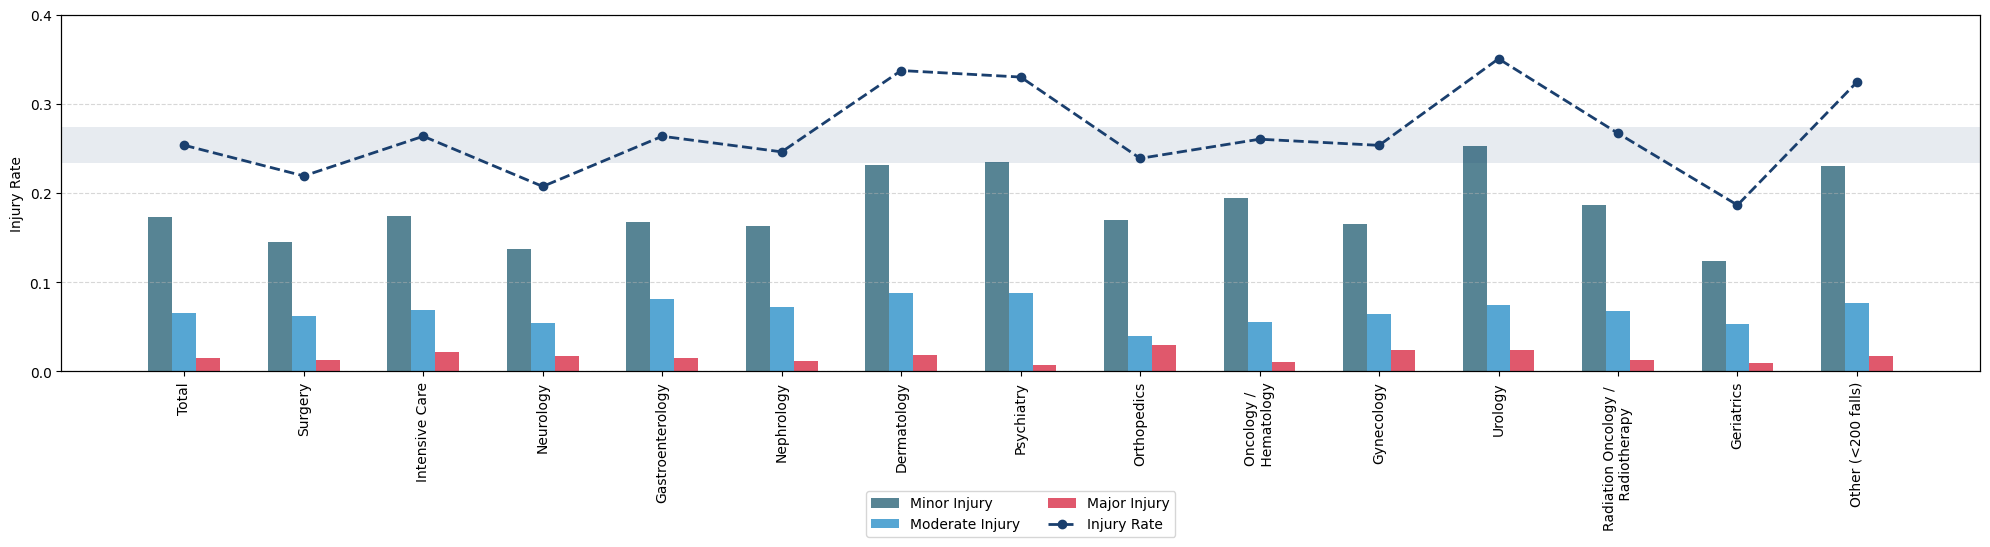

In [134]:
color_no_injury = color_01          # No Injury
color_minor_injury = color_04      # Minor Injury
color_moderate_injury = color_03    # Moderate Injury
color_major_injury = color_contrast1      # Major Injury



# Define the columns to plot
columns_to_plot = ['Minor Injury', 'Moderate Injury', 'Major Injury']

# Set the width of the bars and the positions of the bars
bar_width = 0.2
departments = stats_table_newNames['Department']
positions = range(len(departments))

# Calculate the center positions for the bars
center_positions = [p + bar_width * (len(columns_to_plot) - 1) / 2 for p in positions]

# Create the plot
fig, ax1 = plt.subplots(figsize=(20, 6))

# Plot bars for each injury type on the first y-axis
for i, column in enumerate(columns_to_plot):
    ax1.bar([p + i * bar_width for p in positions], 
            stats_table_newNames[column], 
            width=bar_width,
            color=[color_04, color_03, color_contrast1][i], 
            label=column)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot 'No Injury' as a line on the second y-axis
ax2.plot(center_positions, stats_table_newNames['Injury With Injury'], color=color_01, marker='o', linestyle='--', linewidth=2, label='Injury Rate')

# Add labels, title, and legends
ax1.set_xlabel('')
ax1.set_ylabel('Injury Rate')
#ax2.set_ylabel('Injury Rate')
#ax1.set_title('Injury Statistics by Department')

ax2.set_ylim(0, 0.4)
ax1.set_ylim(0, 0.4)

ax2.set_yticklabels([])  # Hide y-axis labels on ax2
ax2.set_yticks([])  # Optionally, hide y-axis ticks on ax2 if needed



ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax1.set_yticks([0, 0.1, 0.2, 0.3, 0.4])  # Set y-axis ticks on ax1 at specified intervals


ax1.axhspan(0.2335, 0.2735, facecolor=color_01, alpha=0.1)


# Set x-axis ticks and labels
ax1.set_xticks(center_positions)
ax1.set_xticklabels(departments, rotation=90)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='center', bbox_to_anchor=(0.5, -0.4), ncol=2)

# Display the plot
plt.tight_layout()
plt.show()


In [135]:
stats_table_newNames_corr = stats_table_newNames[stats_table_newNames['Department'] != 'Total'].copy()

# calculate correlation between No Injury and Minor Injury using Pearson correlation and p value
from scipy.stats import pearsonr

no_minor_corr, no_minor_p = pearsonr(stats_table_newNames_corr['No Injury'], stats_table_newNames_corr['Minor Injury'])
no_moderate_corr, no_moderate_p = pearsonr(stats_table_newNames_corr['No Injury'], stats_table_newNames_corr['Moderate Injury'])
no_major_corr, no_major_p = pearsonr(stats_table_newNames_corr['No Injury'], stats_table_newNames_corr['Major Injury'])


print(f'Correlation between No Injury and Minor Injury: corr: {no_minor_corr:.4f}, p: {no_minor_p:.4f}')
print(f'Correlation between No Injury and Moderate Injury: corr: {no_moderate_corr:.4f}, p: {no_moderate_p:.4f}')
print(f'Correlation between No Injury and Major Injury: corr: {no_major_corr:.4f}, p: {no_major_p:.4f}')


Correlation between No Injury and Minor Injury: corr: -0.9821, p: 0.0000
Correlation between No Injury and Moderate Injury: corr: -0.7515, p: 0.0019
Correlation between No Injury and Major Injury: corr: -0.1435, p: 0.6246


In [136]:
stats_table_newNames_corr = stats_table_newNames[stats_table_newNames['Department'] != 'Total'].copy()

# calculate correlation between injury rate and Minor Injury using Pearson correlation and p value
from scipy.stats import pearsonr

no_minor_corr, no_minor_p = pearsonr(stats_table_newNames_corr['Injury With Injury'], stats_table_newNames_corr['Minor Injury'])
no_moderate_corr, no_moderate_p = pearsonr(stats_table_newNames_corr['Injury With Injury'], stats_table_newNames_corr['Moderate Injury'])
no_major_corr, no_major_p = pearsonr(stats_table_newNames_corr['Injury With Injury'], stats_table_newNames_corr['Major Injury'])


print(f'Correlation between injury rate and Minor Injury: corr: {no_minor_corr:.4f}, p: {no_minor_p:.4f}')
print(f'Correlation between injury rate and Moderate Injury: corr: {no_moderate_corr:.4f}, p: {no_moderate_p:.4f}')
print(f'Correlation between injury rate and Major Injury: corr: {no_major_corr:.4f}, p: {no_major_p:.4f}')


Correlation between injury rate and Minor Injury: corr: 0.9821, p: 0.0000
Correlation between injury rate and Moderate Injury: corr: 0.7515, p: 0.0019
Correlation between injury rate and Major Injury: corr: 0.1435, p: 0.6246


In [137]:
# correlation between number of falls and injury severity

# calculate correlation between number of falls and injury severity using Pearson correlation and p value

minor_corr, minor_p = pearsonr(stats_table_newNames_corr['Falls'], stats_table_newNames_corr['Minor Injury'])
moderate_corr, moderate_p = pearsonr(stats_table_newNames_corr['Falls'], stats_table_newNames_corr['Moderate Injury'])
major_corr, major_p = pearsonr(stats_table_newNames_corr['Falls'], stats_table_newNames_corr['Major Injury'])

print(f'Correlation between Number of Falls and Minor Injury: corr: {minor_corr:.4f}, p: {minor_p:.4f}')
print(f'Correlation between Number of Falls and Moderate Injury: corr: {moderate_corr:.4f}, p: {moderate_p:.4f}')
print(f'Correlation between Number of Falls and Major Injury: corr: {major_corr:.4f}, p: {major_p:.4f}')

Correlation between Number of Falls and Minor Injury: corr: -0.4366, p: 0.1186
Correlation between Number of Falls and Moderate Injury: corr: -0.2910, p: 0.3127
Correlation between Number of Falls and Major Injury: corr: -0.2554, p: 0.3781


In [138]:
stats_table_newNames['Fall Incidence 25'] = stats_table_newNames['Fall Incidence Normed']*25
stats_table_newNames['Proportion of Falls 25'] = stats_table_newNames['Proportion of Falls Normed']*25
stats_table_newNames['Fall Trend Normed 25'] = stats_table_newNames['Fall Trend Normed']*25
stats_table_newNames['Weighted Injury Severity Normed 25'] = stats_table_newNames['Weighted Injury Severity Normed']*25

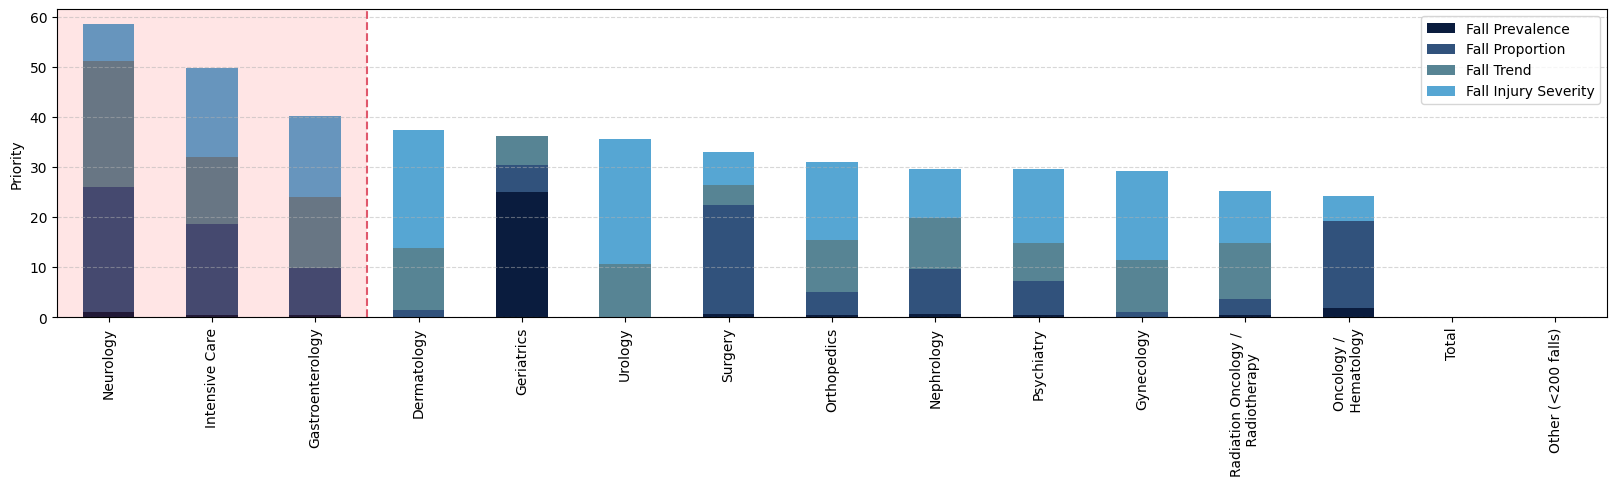

In [139]:
stats_table_newNames = stats_table_newNames.sort_values('Priority', ascending=False)
# Select only the relevant columns
columns_to_plot = ['Fall Incidence 25', 'Proportion of Falls 25', 'Fall Trend Normed 25', 'Weighted Injury Severity Normed 25']
df_plot = stats_table_newNames[['Department'] + columns_to_plot]


legend_labels = ['Fall Prevalence', 'Fall Proportion', 'Fall Trend', 'Fall Injury Severity']


# Set 'Department' as the index
df_plot.set_index('Department', inplace=True)

# Create a stacked bar plot
ax = df_plot.plot(kind='bar', stacked=True, figsize=(20, 4), color=[color_dark, color_01_light, color_04, color_03])


# Customize the plot with labels and title
ax.set_xlabel('Department')
ax.set_ylabel('Priority')
#ax.set_title('Stacked Bar Plot of Fall Metrics by Department')

ax.legend(legend_labels)


# Add a vertical line between columns 3 and 4
column_index = 2.5  # The position between the 3rd and 4th columns
ax.axvline(x=column_index, color=color_contrast1, linestyle='--', linewidth=1.5)  # Customize color, linestyle, and linewidth as needed

# Add a background shading up to the vertical line
ax.axvspan(-0.5, 2.5, facecolor='red', alpha=0.1)

ax.grid(axis='y', linestyle='--', alpha=0.5)

ax.set_xlabel('')

# Show the plot
plt.show()
